In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

## 1. Load expression data

The `transformation` value can be one of `"none"`, `"sqrt"` or `"log"`, which determines how the expression data should be transformed in order to reduce outlier influence.

In [3]:
data_path: str = "data/Athaliana.csv"
transformation: str = "log"

In [4]:
# Parameters
data_path = "data/processed_data/floral_transition.csv"
transformation = "sqrt"


In [5]:
from my_gatai import Expression_data

expression_data = Expression_data.from_csv(data_path, 
                                           transformation=transformation)
expression_data.full

,Phylostratum,GeneID,TP1,TP2,TP3,TP4,TP5,TP6,TP7
0,0.705924,at1g01010,2.416764,2.619943,2.473723,2.317008,2.461993,2.200697,2.821192
1,0.705924,at1g01020,2.495246,2.582087,2.597364,2.730747,2.676457,2.747086,2.528967
2,0.705924,at1g01040,4.854236,5.098336,4.767746,4.653653,4.478829,4.802210,5.142442
3,0.705924,at1g01050,7.181496,7.506390,6.705106,6.423444,6.339675,6.629789,7.240536
4,0.803240,at1g01060,8.396736,9.951856,9.385583,6.317615,6.784620,7.335279,8.912699
...,...,...,...,...,...,...,...,...,...
15491,0.705924,atcg00800,1.612615,1.629820,1.558312,1.470608,1.443992,2.084957,1.499900
15492,0.705924,atcg01020,2.706842,2.611193,2.253875,2.536521,2.097144,2.827260,2.295381
15493,0.903459,atmg00030,7.729567,8.570700,6.124332,4.631382,5.716684,9.702795,8.170928
15494,0.973735,atmg00660,2.344070,2.082176,2.293624,2.023964,1.956286,2.141461,2.098938


In [6]:
expression_data.p_matrix

,TP1,TP2,TP3,TP4,TP5,TP6,TP7
0,0.000023,0.000025,0.000023,0.000022,0.000023,0.000021,0.000027
1,0.000024,0.000024,0.000025,0.000026,0.000025,0.000027,0.000024
2,0.000046,0.000048,0.000045,0.000044,0.000043,0.000046,0.000049
3,0.000068,0.000071,0.000064,0.000061,0.000060,0.000064,0.000069
4,0.000091,0.000107,0.000101,0.000068,0.000073,0.000081,0.000097
...,...,...,...,...,...,...,...
15491,0.000015,0.000015,0.000015,0.000014,0.000014,0.000020,0.000014
15492,0.000026,0.000025,0.000021,0.000024,0.000020,0.000027,0.000022
15493,0.000094,0.000104,0.000074,0.000056,0.000070,0.000120,0.000100
15494,0.000031,0.000027,0.000030,0.000027,0.000026,0.000029,0.000028


In [7]:
expression_data.tai

TP1    0.745027
TP2    0.745621
TP3    0.745289
TP4    0.744738
TP5    0.744765
TP6    0.744207
TP7    0.744833
dtype: float64

### 1.1 Compute TAI value

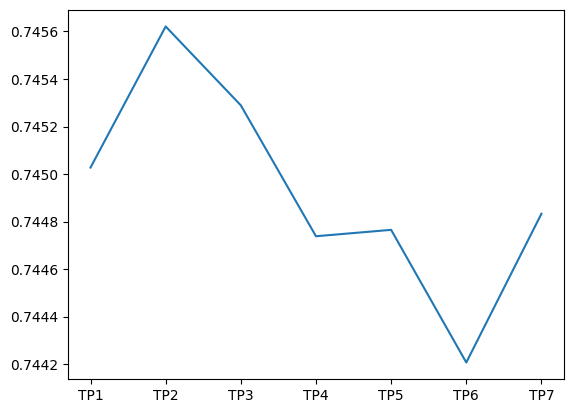

In [8]:
import matplotlib.pyplot as plt

plt.plot(expression_data.tai)
plt.show()

## 2. Flatline test

### 2.1. Compute variance of TAI curve

In [9]:
import numpy as np
tai_var = np.var(expression_data.tai).item()
tai_var

1.7327320619275862e-07

### 2.2. Compute permutation variance distribution

Permute the assigned gene ages between the genes to run the flat line test

In [10]:
from gatai.utils import comp_vars

num_permutations = 10000
permutation_comp_vars = comp_vars(expression_data, num_permutations)

Running permuations


  0%|                                                                                                                                                                                          | 0/10000 [00:00<?, ?it/s]

  3%|█████▊                                                                                                                                                                        | 331/10000 [00:00<00:02, 3304.28it/s]

  7%|███████████▌                                                                                                                                                                  | 662/10000 [00:00<00:02, 3272.62it/s]

 10%|█████████████████▏                                                                                                                                                            | 990/10000 [00:00<00:02, 3262.52it/s]

 13%|██████████████████████▊                                                                                                                                                      | 1317/10000 [00:00<00:02, 3262.69it/s]

 16%|████████████████████████████▍                                                                                                                                                | 1644/10000 [00:00<00:02, 2976.27it/s]

 20%|██████████████████████████████████                                                                                                                                           | 1971/10000 [00:00<00:02, 3067.19it/s]

 23%|███████████████████████████████████████▉                                                                                                                                     | 2310/10000 [00:00<00:02, 3167.64it/s]

 26%|█████████████████████████████████████████████▋                                                                                                                               | 2639/10000 [00:00<00:02, 3203.84it/s]

 30%|███████████████████████████████████████████████████▎                                                                                                                         | 2967/10000 [00:00<00:02, 3225.64it/s]

 33%|█████████████████████████████████████████████████████████▏                                                                                                                   | 3307/10000 [00:01<00:02, 3278.27it/s]

 36%|███████████████████████████████████████████████████████████████                                                                                                              | 3643/10000 [00:01<00:01, 3301.32it/s]

 40%|████████████████████████████████████████████████████████████████████▊                                                                                                        | 3979/10000 [00:01<00:01, 3317.62it/s]

 43%|██████████████████████████████████████████████████████████████████████████▌                                                                                                  | 4313/10000 [00:01<00:01, 3321.44it/s]

 46%|████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 4646/10000 [00:01<00:01, 3298.27it/s]

 50%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 4981/10000 [00:01<00:01, 3313.17it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 5317/10000 [00:01<00:01, 3327.15it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 5650/10000 [00:01<00:01, 3308.84it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 5982/10000 [00:01<00:01, 3309.54it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 6319/10000 [00:01<00:01, 3325.68it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 6652/10000 [00:02<00:01, 3306.51it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 6989/10000 [00:02<00:00, 3323.53it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 7322/10000 [00:02<00:00, 3303.52it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 7653/10000 [00:02<00:00, 2993.46it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 7969/10000 [00:02<00:00, 3037.26it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 8277/10000 [00:02<00:00, 2887.11it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 8607/10000 [00:02<00:00, 3001.24it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 8932/10000 [00:02<00:00, 3069.32it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 9260/10000 [00:02<00:00, 3127.65it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 9590/10000 [00:02<00:00, 3175.44it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 9910/10000 [00:03<00:00, 3166.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3197.00it/s]

### 2.3. Fit the random variances to a Gamma distribution and compute the p-value of the true TAI

In [11]:
from flatline import fit_gamma, p_value_function

# NOTE: the default fitting method used by scipy doesn't achieve a very good fit, so use "MM"
a, loc, scale = fit_gamma(permutation_comp_vars)
get_p_value = p_value_function(a, loc, scale)
print("Gamma fit params:", a, loc, scale)

Gamma fit params: 0.6271814827775907 1.074767757073636e-09 9.426814478126993e-09


In [12]:
print("p-value of TAI:", get_p_value(tai_var))

p-value of TAI: 2.708575585799181e-09


### 2.4. Visually compare the random TAI variances against the true one

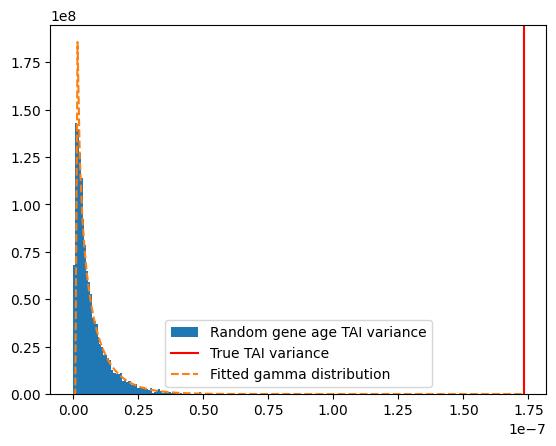

In [13]:
from scipy import stats
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")

x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")

plt.legend()
plt.show()

## 3. Destroy TAI signal with GATAI

### 3.1 Run genetic algorithm to extract genes that break the pattern
Note that the transformation used for the expression data heavily influences the number of genes that get extracted, as well as the number of generations needed for convergence.

Also, with transformations applied, older genes are better represented

In [14]:
from my_gatai import get_extracted_genes

ga_genes = get_extracted_genes(expression_data, permutation_comp_vars)

gen	island	Num removed	Variance
0  	      	5          	1.97942 


10 	1     	363        	1.67066 
10 	2     	359        	1.62537 
10 	3     	299        	1.67113 
10 	4     	375        	1.83191 




20 	1     	276        	1.65882 
20 	2     	289        	1.56646 
20 	3     	341        	1.54112 
20 	4     	421        	1.59347 




30 	1     	391        	1.46881 
30 	2     	254        	1.52571 
30 	3     	411        	1.50475 
30 	4     	393        	1.51012 




40 	1     	464        	1.46717 
40 	2     	334        	1.43314 
40 	3     	462        	1.45463 
40 	4     	470        	1.46558 




50 	1     	524        	1.43997 
50 	2     	453        	1.43134 
50 	3     	322        	1.42532 
50 	4     	467        	1.42303 




60 	1     	366        	1.41766 
60 	2     	459        	1.38496 
60 	3     	386        	1.40585 
60 	4     	380        	1.41395 




70 	1     	447        	1.36236 
70 	2     	561        	1.36354 
70 	3     	504        	1.37151 
70 	4     	515        	1.35999 




80 	1     	350        	1.34645 
80 	2     	514        	1.35278 
80 	3     	558        	1.33826 
80 	4     	756        	1.3478  




90 	1     	401        	1.31552 
90 	2     	412        	1.31753 
90 	3     	327        	1.33146 
90 	4     	533        	1.31302 




100	1     	509        	1.29216 
100	2     	441        	1.3008  
100	3     	395        	1.31101 
100	4     	690        	1.29047 




110	1     	565        	1.25901 
110	2     	642        	1.26851 
110	3     	479        	1.28738 
110	4     	501        	1.29268 




120	1     	617        	1.2495  
120	2     	740        	1.24327 
120	3     	837        	1.25338 
120	4     	1024       	1.24601 




130	1     	938        	1.23285 
130	2     	680        	1.2403  
130	3     	842        	1.23155 
130	4     	992        	1.22666 




140	1     	958        	1.2233  
140	2     	937        	1.22078 
140	3     	973        	1.22576 
140	4     	1128       	1.21754 




150	1     	1145       	1.20239 
150	2     	766        	1.2038  
150	3     	702        	1.21177 
150	4     	1230       	1.20414 




160	1     	765        	1.18796 
160	2     	772        	1.19304 
160	3     	902        	1.19329 
160	4     	1052       	1.18021 




170	1     	869        	1.18079 
170	2     	811        	1.17542 
170	3     	838        	1.18036 
170	4     	923        	1.17938 




180	1     	873        	1.16231 
180	2     	759        	1.17643 
180	3     	992        	1.16203 
180	4     	1060       	1.16066 




190	1     	932        	1.15681 
190	2     	1044       	1.15835 
190	3     	831        	1.15476 
190	4     	992        	1.15056 




200	1     	894        	1.14974 
200	2     	966        	1.14938 
200	3     	899        	1.15401 
200	4     	1141       	1.1437  




210	1     	1145       	1.14425 
210	2     	1177       	1.13881 
210	3     	730        	1.1442  
210	4     	1145       	1.13166 




220	1     	1189       	1.13197 
220	2     	1095       	1.12266 
220	3     	1160       	1.13547 
220	4     	1203       	1.1334  




230	1     	1195       	1.12374 
230	2     	1123       	1.12405 
230	3     	1066       	1.12013 
230	4     	1074       	1.12259 




240	1     	1192       	1.10989 
240	2     	1143       	1.12121 
240	3     	1160       	1.11523 
240	4     	1155       	1.10881 




250	1     	1131       	1.11402 
250	2     	1214       	1.10493 
250	3     	1192       	1.10989 
250	4     	1163       	1.10571 




260	1     	1036       	1.1087  
260	2     	1163       	1.10571 
260	3     	1210       	1.09679 
260	4     	1215       	1.10142 




270	1     	1279       	1.09368 
270	2     	1157       	1.09575 
270	3     	1298       	1.09473 
270	4     	1413       	1.08972 




280	1     	1386       	1.08797 
280	2     	1413       	1.08972 
280	3     	1409       	1.08745 
280	4     	1146       	1.08389 




290	1     	1189       	1.08092 
290	2     	1146       	1.08389 
290	3     	1312       	1.07334 
290	4     	1302       	1.07389 




300	1     	1278       	1.07306 
300	2     	1302       	1.07389 
300	3     	1243       	1.07179 
300	4     	1343       	1.06811 




310	1     	1377       	1.06491 
310	2     	1398       	1.06766 
310	3     	1440       	1.06102 
310	4     	1356       	1.06255 




320	1     	1507       	1.05626 
320	2     	1356       	1.06255 
320	3     	1318       	1.0566  
320	4     	1442       	1.05611 




330	1     	1376       	1.05195 
330	2     	1437       	1.05497 
330	3     	1478       	1.05571 
330	4     	1401       	1.05205 




340	1     	1263       	1.05051 
340	2     	1293       	1.04986 
340	3     	1376       	1.05195 
340	4     	1355       	1.0463  




350	1     	1321       	1.04547 
350	2     	1355       	1.0463  
350	3     	1324       	1.04742 
350	4     	1280       	1.04473 




360	1     	1501       	1.03847 
360	2     	1258       	1.03649 
360	3     	1349       	1.04449 
360	4     	1448       	1.03959 




370	1     	1440       	1.029   
370	2     	1422       	1.03816 
370	3     	1408       	1.02299 
370	4     	1455       	1.02673 




380	1     	1400       	1.02175 
380	2     	1508       	1.02499 
380	3     	1441       	1.01558 
380	4     	1357       	1.01899 




390	1     	1484       	1.00923 
390	2     	1357       	1.01899 
390	3     	1447       	1.00994 
390	4     	1434       	1.01311 




400	1     	1447       	1.00994 
400	2     	1472       	1.00907 
400	3     	1551       	1.00541 
400	4     	1623       	0.994219




410	1     	1625       	0.993447
410	2     	1623       	0.994219
410	3     	1626       	0.994346
410	4     	1509       	1.00136 




420	1     	1637       	0.988429
420	2     	1617       	0.993214
420	3     	1623       	0.993006
420	4     	1639       	0.990715




430	1     	1675       	0.986493
430	2     	1577       	0.990326
430	3     	1653       	0.986921
430	4     	1741       	0.986175




440	1     	1753       	0.977451
440	2     	1625       	0.982962
440	3     	1695       	0.981823
440	4     	1771       	0.975514




450	1     	1777       	0.973526
450	2     	1869       	0.965961
450	3     	1802       	0.967021
450	4     	1769       	0.975485




460	1     	1820       	0.963498
460	2     	1788       	0.96506 
460	3     	1838       	0.957801
460	4     	1861       	0.956927




470	1     	1757       	0.952084
470	2     	1854       	0.95362 
470	3     	1943       	0.955345
470	4     	1846       	0.956387




480	1     	1833       	0.950605
480	2     	1663       	0.962437
480	3     	1746       	0.947237
480	4     	1786       	0.951049




490	1     	1758       	0.947601
490	2     	1787       	0.947181
490	3     	1874       	0.943922
490	4     	1699       	0.942542




500	1     	1627       	0.951462
500	2     	1806       	0.943834
500	3     	1800       	0.940322
500	4     	1761       	0.933925




510	1     	1748       	0.929274
510	2     	1747       	0.932297
510	3     	1799       	0.935621
510	4     	1806       	0.929185




520	1     	1707       	0.921002
520	2     	1738       	0.926224
520	3     	1867       	0.926835
520	4     	1737       	0.927305




530	1     	1930       	0.92295 
530	2     	1699       	0.924703
530	3     	1690       	0.920785
530	4     	2005       	0.917996




540	1     	1737       	0.915869
540	2     	2049       	0.911572
540	3     	1707       	0.922237
540	4     	1779       	0.907792




550	1     	1646       	0.902787
550	2     	1779       	0.907792
550	3     	1818       	0.90944 
550	4     	1590       	0.915866




560	1     	1829       	0.900528
560	2     	1633       	0.901742
560	3     	1803       	0.906978
560	4     	1805       	0.901373




570	1     	1882       	0.891071
570	2     	1577       	0.899866
570	3     	1653       	0.897077
570	4     	1814       	0.895864




580	1     	1631       	0.8945  
580	2     	1831       	0.887274
580	3     	1664       	0.889863
580	4     	1646       	0.896121




590	1     	1750       	0.878497
590	2     	1712       	0.891187
590	3     	1712       	0.881244
590	4     	1813       	0.885227




600	1     	1862       	0.878503
600	2     	1730       	0.880894
600	3     	1732       	0.876958
600	4     	1773       	0.873701




610	1     	1796       	0.869975
610	2     	1805       	0.867092
610	3     	1832       	0.873945
610	4     	1863       	0.869832




620	1     	1785       	0.867602
620	2     	1863       	0.869832
620	3     	1808       	0.850763
620	4     	1665       	0.870575




630	1     	1865       	0.849625
630	2     	1707       	0.86976 
630	3     	1897       	0.849607
630	4     	1860       	0.850391




640	1     	1790       	0.843901
640	2     	1723       	0.859984
640	3     	1897       	0.851495
640	4     	1942       	0.837604




650	1     	1910       	0.830167
650	2     	1925       	0.834596
650	3     	1908       	0.846374
650	4     	1828       	0.835391




660	1     	1852       	0.827919
660	2     	1876       	0.835737
660	3     	1935       	0.8254  
660	4     	1881       	0.830831




670	1     	1989       	0.822261
670	2     	1834       	0.830395
670	3     	1905       	0.823661
670	4     	2084       	0.81857 




680	1     	2112       	0.815365
680	2     	2068       	0.814565
680	3     	1989       	0.822261
680	4     	1866       	0.807122




690	1     	1844       	0.804469
690	2     	1919       	0.806353
690	3     	1917       	0.805869
690	4     	1868       	0.801367




700	1     	1825       	0.796356
700	2     	1847       	0.797049
700	3     	1906       	0.803412
700	4     	1825       	0.794297




710	1     	1784       	0.80353 
710	2     	1809       	0.791975
710	3     	1951       	0.792104
710	4     	1965       	0.789384




720	1     	1937       	0.789231
720	2     	1908       	0.785726
720	3     	1901       	0.778655
720	4     	1778       	0.782231




730	1     	1958       	0.776586
730	2     	1841       	0.778672
730	3     	1938       	0.759301
730	4     	2005       	0.760338




740	1     	2050       	0.752197
740	2     	1757       	0.781887
740	3     	1958       	0.776586
740	4     	2026       	0.750459




750	1     	2071       	0.744007
750	2     	2026       	0.750459
750	3     	2109       	0.747529
750	4     	1853       	0.759652




760	1     	2109       	0.747529
760	2     	2042       	0.740705
760	3     	2148       	0.734193
760	4     	2002       	0.746952




770	1     	2148       	0.734193
770	2     	1991       	0.744519
770	3     	2020       	0.739979
770	4     	2112       	0.723384




780	1     	2198       	0.70255 
780	2     	2058       	0.723952
780	3     	2100       	0.72349 
780	4     	2159       	0.716997




790	1     	2113       	0.703569
790	2     	2196       	0.699227
790	3     	2243       	0.698556
790	4     	1895       	0.720113




800	1     	2367       	0.68956 
800	2     	2042       	0.709655
800	3     	2252       	0.688462
800	4     	2363       	0.690934




810	1     	2313       	0.679709
810	2     	2343       	0.688689
810	3     	2088       	0.690922
810	4     	2208       	0.681029




820	1     	2158       	0.688789
820	2     	2208       	0.681029
820	3     	2313       	0.679709
820	4     	2326       	0.673043




830	1     	2371       	0.668269
830	2     	2326       	0.673043
830	3     	2282       	0.676793
830	4     	2342       	0.667787




840	1     	2227       	0.665503
840	2     	2342       	0.667787
840	3     	2491       	0.661094
840	4     	2123       	0.671309




850	1     	2176       	0.65989 
850	2     	2187       	0.665965
850	3     	2229       	0.658296
850	4     	2337       	0.656684




860	1     	2087       	0.662339
860	2     	2133       	0.661958
860	3     	2155       	0.657334
860	4     	2236       	0.639486




870	1     	2236       	0.639486
870	2     	2285       	0.629035
870	3     	2171       	0.653797
870	4     	2155       	0.657334




880	1     	2213       	0.635037
880	2     	2291       	0.638428
880	3     	2321       	0.60759 
880	4     	2060       	0.649884




890	1     	2317       	0.607155
890	2     	2104       	0.630855
890	3     	2438       	0.597832
890	4     	2277       	0.598566




900	1     	2291       	0.58316 
900	2     	2252       	0.644344
900	3     	2156       	0.599682
900	4     	2280       	0.595519




910	1     	2217       	0.592621
910	2     	2239       	0.581906
910	3     	2398       	0.566985
910	4     	2236       	0.597292




920	1     	2402       	0.557281
920	2     	2198       	0.589475
920	3     	2339       	0.573938
920	4     	2341       	0.559474




930	1     	2388       	0.558835
930	2     	2373       	0.555655
930	3     	2313       	0.568933
930	4     	2356       	0.56955 




940	1     	2283       	0.572965
940	2     	2395       	0.550956
940	3     	2395       	0.550956
940	4     	2403       	0.561293




950	1     	2395       	0.550956
950	2     	2317       	0.550715
950	3     	2387       	0.549323
950	4     	2416       	0.542663




960	1     	2383       	0.534615
960	2     	2317       	0.550715
960	3     	2434       	0.548779
960	4     	2454       	0.537575




970	1     	2381       	0.533973
970	2     	2432       	0.526794
970	3     	2345       	0.543536
970	4     	2424       	0.541033




980	1     	2208       	0.536633
980	2     	2381       	0.533973
980	3     	2404       	0.525513
980	4     	2328       	0.539632




990	1     	2347       	0.517946
990	2     	2220       	0.526914
990	3     	2399       	0.526369
990	4     	2407       	0.529355




1000	1     	2445       	0.517082
1000	2     	2347       	0.517946
1000	3     	2282       	0.519892
1000	4     	2379       	0.51806 




1010	1     	2404       	0.510994
1010	2     	2329       	0.509388
1010	3     	2314       	0.506414
1010	4     	2389       	0.504943




1020	1     	2243       	0.49877 
1020	2     	2388       	0.504938
1020	3     	2308       	0.501321
1020	4     	2316       	0.511322




1030	1     	2223       	0.496851
1030	2     	2235       	0.49855 
1030	3     	2301       	0.475594
1030	4     	2222       	0.512176




1040	1     	2172       	0.50394 
1040	2     	2223       	0.496851
1040	3     	2329       	0.471579
1040	4     	2356       	0.472011




1050	1     	2386       	0.467236
1050	2     	2227       	0.49172 
1050	3     	2430       	0.469768
1050	4     	2388       	0.466599




1060	1     	2431       	0.461207
1060	2     	2388       	0.463407
1060	3     	2300       	0.472113
1060	4     	2388       	0.466599




1070	1     	2431       	0.461207
1070	2     	2431       	0.461207
1070	3     	2466       	0.451201
1070	4     	2431       	0.446965




1080	1     	2482       	0.43113 
1080	2     	2367       	0.455259
1080	3     	2448       	0.447499
1080	4     	2475       	0.428994




1090	1     	2412       	0.431555
1090	2     	2475       	0.428994
1090	3     	2482       	0.43113 
1090	4     	2364       	0.428154




1100	1     	2364       	0.428154
1100	2     	2363       	0.427944
1100	3     	2475       	0.428994
1100	4     	2582       	0.412153




1110	1     	2484       	0.423363
1110	2     	2548       	0.402885
1110	3     	2422       	0.418104
1110	4     	2331       	0.423478




1120	1     	2534       	0.412576
1120	2     	2525       	0.39871 
1120	3     	2390       	0.419568
1120	4     	2383       	0.416211




1130	1     	2516       	0.409929
1130	2     	2487       	0.400169
1130	3     	2570       	0.398699
1130	4     	2324       	0.422948




1140	1     	2633       	0.395923
1140	2     	2429       	0.406248
1140	3     	2593       	0.388334
1140	4     	2598       	0.394123




1150	1     	2593       	0.388334
1150	2     	2598       	0.394123
1150	3     	2534       	0.390125
1150	4     	2558       	0.392015




1160	1     	2559       	0.383826
1160	2     	2593       	0.388334
1160	3     	2448       	0.379545
1160	4     	2521       	0.386142




1170	1     	2487       	0.390228
1170	2     	2502       	0.383824
1170	3     	2448       	0.379545
1170	4     	2500       	0.353755




1180	1     	2411       	0.358229
1180	2     	2478       	0.35344 
1180	3     	2470       	0.368304
1180	4     	2429       	0.372089




1190	1     	2520       	0.36649 
1190	2     	2375       	0.353968
1190	3     	2466       	0.349272
1190	4     	2478       	0.35344 




1200	1     	2478       	0.35344 
1200	2     	2445       	0.374394
1200	3     	2453       	0.347672
1200	4     	2511       	0.335287




1210	1     	2494       	0.329067
1210	2     	2511       	0.335287
1210	3     	2438       	0.340937
1210	4     	2537       	0.331121




1220	1     	2500       	0.334765
1220	2     	2449       	0.322958
1220	3     	2498       	0.321039
1220	4     	2619       	0.324402




1230	1     	2553       	0.312864
1230	2     	2580       	0.316805
1230	3     	2490       	0.320098
1230	4     	2472       	0.321566




1240	1     	2466       	0.320096
1240	2     	2553       	0.312864
1240	3     	2397       	0.326721
1240	4     	2498       	0.317659




1250	1     	2549       	0.310351
1250	2     	2367       	0.311714
1250	3     	2604       	0.309098
1250	4     	2498       	0.317659




1260	1     	2604       	0.309098
1260	2     	2334       	0.315661
1260	3     	2414       	0.309825
1260	4     	2396       	0.309099




1270	1     	2604       	0.309098
1270	2     	2604       	0.309098
1270	3     	2653       	0.295656
1270	4     	2448       	0.295654




1280	1     	2701       	0.284241
1280	2     	2585       	0.30586 
1280	3     	2292       	0.297563
1280	4     	2396       	0.292864




1290	1     	2668       	0.285702
1290	2     	2697       	0.284349
1290	3     	2701       	0.284241
1290	4     	2236       	0.334441




1300	1     	2367       	0.297236
1300	2     	2668       	0.285702
1300	3     	2742       	0.272095
1300	4     	2729       	0.271891




1310	1     	2692       	0.267939
1310	2     	2729       	0.271891
1310	3     	2789       	0.270225
1310	4     	2834       	0.269285




1320	1     	2774       	0.261722
1320	2     	2834       	0.269285
1320	3     	2692       	0.267939
1320	4     	2789       	0.270225




1330	1     	2742       	0.249216
1330	2     	2759       	0.248999
1330	3     	2840       	0.265865
1330	4     	2940       	0.256298




1340	1     	2692       	0.267939
1340	2     	2742       	0.249216
1340	3     	2742       	0.244502
1340	4     	2933       	0.25109 




1350	1     	2793       	0.238486
1350	2     	2643       	0.25661 
1350	3     	2675       	0.251611
1350	4     	2742       	0.244502




1360	1     	2768       	0.235438
1360	2     	2793       	0.238486
1360	3     	2793       	0.238486
1360	4     	2764       	0.229708




1370	1     	2740       	0.242647
1370	2     	2735       	0.223278
1370	3     	2762       	0.223062
1370	4     	2671       	0.249749




1380	1     	2715       	0.245565
1380	2     	2641       	0.239229
1380	3     	2762       	0.223062
1380	4     	2792       	0.222089




1390	1     	2762       	0.223062
1390	2     	2792       	0.222089
1390	3     	2788       	0.215983
1390	4     	2792       	0.213155




1400	1     	2792       	0.213155
1400	2     	2792       	0.213155
1400	3     	2815       	0.215678
1400	4     	2851       	0.214091




1410	1     	2792       	0.213155
1410	2     	2792       	0.213155
1410	3     	2811       	-0      
1410	4     	2790       	-0      




1420	1     	2744       	-0      
1420	2     	2747       	0.213987
1420	3     	2811       	-0      
1420	4     	2777       	-0      




1430	1     	2744       	-0      
1430	2     	2747       	0.213987
1430	3     	2808       	-0      
1430	4     	2765       	-0      




1440	1     	2735       	-0      
1440	2     	2747       	0.213987
1440	3     	2742       	-0      
1440	4     	2772       	-0      




1450	1     	2718       	0.213155
1450	2     	2690       	-0      
1450	3     	2742       	-0      
1450	4     	2751       	-0      




1460	1     	2751       	-0      
1460	2     	2690       	-0      
1460	3     	2626       	-0      
1460	4     	2703       	-0      




1470	1     	2703       	-0      
1470	2     	2751       	-0      
1470	3     	2670       	-0      
1470	4     	2582       	-0      




1480	1     	2673       	-0      
1480	2     	2751       	-0      
1480	3     	2686       	-0      
1480	4     	2582       	-0      




1490	1     	2554       	-0      
1490	2     	2673       	-0      
1490	3     	2639       	-0      
1490	4     	2529       	-0      




1500	1     	2506       	-0      
1500	2     	2554       	-0      
1500	3     	2673       	-0      
1500	4     	2508       	-0      




1510	1     	2506       	-0      
1510	2     	2494       	-0      
1510	3     	2488       	-0      
1510	4     	2664       	-0      




1520	1     	2444       	-0      
1520	2     	2494       	-0      
1520	3     	2463       	-0      
1520	4     	2488       	-0      




1530	1     	2264       	0.287786
1530	2     	2443       	-0      
1530	3     	2443       	-0      
1530	4     	2433       	-0      




1540	1     	2407       	-0      
1540	2     	2414       	-0      
1540	3     	2415       	-0      
1540	4     	2436       	-0      




1550	1     	2373       	-0      
1550	2     	2324       	-0      
1550	3     	2401       	-0      
1550	4     	2390       	-0      




1560	1     	2339       	-0      
1560	2     	2233       	0.233849
1560	3     	2324       	-0      
1560	4     	2355       	-0      




1570	1     	2310       	-0      
1570	2     	2230       	0.232821
1570	3     	2290       	-0      
1570	4     	2263       	-0      




1580	1     	2241       	-0      
1580	2     	2310       	-0      
1580	3     	2327       	-0      
1580	4     	2261       	-0      




1590	1     	2233       	-0      
1590	2     	2241       	-0      
1590	3     	2302       	-0      
1590	4     	2308       	-0      




1600	1     	2085       	-0      
1600	2     	2198       	-0      
1600	3     	2134       	0.220225
1600	4     	2302       	-0      




1610	1     	2290       	-0      
1610	2     	2077       	-0      
1610	3     	2178       	-0      
1610	4     	2285       	-0      




1620	1     	2274       	-0      
1620	2     	2007       	0.215246
1620	3     	2077       	-0      
1620	4     	2147       	-0      




1630	1     	2146       	-0      
1630	2     	1999       	0.227839
1630	3     	2077       	-0      
1630	4     	2060       	-0      




1640	1     	2060       	-0      
1640	2     	2146       	-0      
1640	3     	2052       	-0      
1640	4     	2008       	0.220346




1650	1     	2047       	-0      
1650	2     	2112       	-0      
1650	3     	2027       	0.210772
1650	4     	2020       	-0      




1660	1     	2006       	-0      
1660	2     	2107       	0.217018
1660	3     	2112       	-0      
1660	4     	2020       	-0      




1670	1     	2020       	-0      
1670	2     	1986       	-0      
1670	3     	2096       	-0      
1670	4     	2014       	-0      




1680	1     	2014       	-0      
1680	2     	2020       	-0      
1680	3     	1986       	-0      
1680	4     	2066       	-0      




1690	1     	1939       	0.236704
1690	2     	2004       	-0      
1690	3     	1844       	-0      
1690	4     	1956       	-0      




1700	1     	1956       	-0      
1700	2     	1983       	0.210662
1700	3     	2004       	-0      
1700	4     	1844       	-0      




1710	1     	1956       	-0      
1710	2     	1958       	-0      
1710	3     	1974       	-0      
1710	4     	1843       	-0      




1720	1     	1843       	-0      
1720	2     	1953       	-0      
1720	3     	1974       	-0      
1720	4     	1835       	-0      




1730	1     	1813       	-0      
1730	2     	1843       	-0      
1730	3     	1906       	-0      
1730	4     	1954       	-0      




1740	1     	1811       	-0      
1740	2     	1813       	-0      
1740	3     	1906       	-0      
1740	4     	1836       	-0      




1750	1     	1810       	-0      
1750	2     	1806       	-0      
1750	3     	1813       	-0      
1750	4     	1836       	-0      




1760	1     	1681       	0.231892
1760	2     	1793       	-0      
1760	3     	1806       	-0      
1760	4     	1813       	-0      




1770	1     	1813       	-0      
1770	2     	1778       	0.217949
1770	3     	1793       	-0      
1770	4     	1799       	-0      




1780	1     	1796       	-0      
1780	2     	1803       	-0      
1780	3     	1765       	-0      
1780	4     	1793       	-0      




1790	1     	1793       	-0      
1790	2     	1765       	-0      
1790	3     	1747       	-0      
1790	4     	1782       	-0      




1800	1     	1739       	-0      
1800	2     	1789       	-0      
1800	3     	1747       	-0      
1800	4     	1745       	-0      




1810	1     	1745       	-0      
1810	2     	1734       	-0      
1810	3     	1747       	-0      
1810	4     	1713       	-0      




1820	1     	1712       	-0      
1820	2     	1729       	-0      
1820	3     	1743       	0.235427
1820	4     	1744       	-0      




1830	1     	1744       	-0      
1830	2     	1712       	-0      
1830	3     	1729       	-0      
1830	4     	1788       	0.214934




1840	1     	1738       	-0      
1840	2     	1707       	0.211795
1840	3     	1699       	-0      
1840	4     	1788       	0.214934




1850	1     	1687       	0.21244 
1850	2     	1738       	-0      
1850	3     	1699       	-0      
1850	4     	1713       	0.218791




1860	1     	1669       	0.214091
1860	2     	1676       	0.210976
1860	3     	1675       	-0      
1860	4     	1651       	0.22785 




1870	1     	1669       	0.214091
1870	2     	1676       	0.210976
1870	3     	1669       	-0      
1870	4     	1675       	-0      




1880	1     	1648       	0.216602
1880	2     	1670       	0.210974
1880	3     	1676       	0.210976
1880	4     	1669       	-0      




1890	1     	1658       	-0      
1890	2     	1666       	0.212328
1890	3     	1670       	0.210974
1890	4     	1669       	-0      




1900	1     	1658       	-0      
1900	2     	1655       	-0      
1900	3     	1665       	-0      
1900	4     	1669       	-0      




1910	1     	1646       	-0      
1910	2     	1658       	-0      
1910	3     	1651       	-0      
1910	4     	1654       	-0      




1920	1     	1643       	-0      
1920	2     	1646       	-0      
1920	3     	1632       	0.216809
1920	4     	1651       	-0      




1930	1     	1616       	-0      
1930	2     	1637       	-0      
1930	3     	1646       	-0      
1930	4     	1618       	0.215562




1940	1     	1594       	0.216604
1940	2     	1608       	-0      
1940	3     	1633       	-0      
1940	4     	1609       	-0      




1950	1     	1609       	-0      
1950	2     	1606       	-0      
1950	3     	1617       	-0      
1950	4     	1607       	0.223064




1960	1     	1566       	0.21619 
1960	2     	1609       	-0      
1960	3     	1606       	-0      
1960	4     	1617       	-0      




1970	1     	1593       	-0      
1970	2     	1565       	0.215558
1970	3     	1609       	-0      
1970	4     	1606       	-0      




1980	1     	1606       	-0      
1980	2     	1585       	-0      
1980	3     	1587       	-0      
1980	4     	1600       	-0      




1990	1     	1586       	-0      
1990	2     	1606       	-0      
1990	3     	1585       	-0      
1990	4     	1578       	-0      




2000	1     	1573       	-0      
2000	2     	1586       	-0      
2000	3     	1606       	-0      
2000	4     	1585       	-0      




2010	1     	1573       	-0      
2010	2     	1573       	-0      
2010	3     	1586       	-0      
2010	4     	1585       	-0      




2020	1     	1564       	-0      
2020	2     	1569       	-0      
2020	3     	1573       	-0      
2020	4     	1563       	-0      




2030	1     	1540       	-0      
2030	2     	1569       	-0      
2030	3     	1554       	-0      
2030	4     	1573       	-0      




2040	1     	1573       	-0      
2040	2     	1524       	-0      
2040	3     	1569       	-0      
2040	4     	1532       	-0      




2050	1     	1532       	-0      
2050	2     	1524       	-0      
2050	3     	1524       	-0      
2050	4     	1531       	-0      




2060	1     	1515       	-0      
2060	2     	1520       	-0      
2060	3     	1514       	-0      
2060	4     	1519       	0.224833




2070	1     	1516       	0.213258
2070	2     	1508       	-0      
2070	3     	1520       	-0      
2070	4     	1514       	-0      




2080	1     	1487       	-0      
2080	2     	1500       	-0      
2080	3     	1520       	-0      
2080	4     	1503       	-0      




2090	1     	1473       	-0      
2090	2     	1487       	-0      
2090	3     	1505       	-0      
2090	4     	1499       	-0      




2100	1     	1499       	-0      
2100	2     	1473       	-0      
2100	3     	1487       	-0      
2100	4     	1539       	0.218063




2110	1     	1472       	0.218058
2110	2     	1470       	-0      
2110	3     	1473       	-0      
2110	4     	1669       	0.212328




2120	1     	1669       	0.212328
2120	2     	1453       	0.226811
2120	3     	1461       	-0      
2120	4     	1473       	-0      




2130	1     	1473       	-0      
2130	2     	1669       	0.212328
2130	3     	1529       	-0      
2130	4     	1461       	-0      




2140	1     	1471       	-0      
2140	2     	1473       	-0      
2140	3     	1523       	-0      
2140	4     	1454       	-0      




2150	1     	1471       	-0      
2150	2     	1471       	-0      
2150	3     	1522       	-0      
2150	4     	1453       	-0      




2160	1     	1453       	-0      
2160	2     	1471       	-0      
2160	3     	1462       	-0      
2160	4     	1442       	-0      




2170	1     	1442       	-0      
2170	2     	1442       	-0      
2170	3     	1462       	-0      
2170	4     	1437       	-0      




2180	1     	1437       	-0      
2180	2     	1442       	-0      
2180	3     	1440       	-0      
2180	4     	1424       	-0      




2190	1     	1431       	-0      
2190	2     	1433       	-0      
2190	3     	1406       	-0      
2190	4     	1407       	-0      




2200	1     	1404       	-0      
2200	2     	1417       	-0      
2200	3     	1433       	-0      
2200	4     	1406       	-0      




2210	1     	1343       	0.236715
2210	2     	1403       	-0      
2210	3     	1433       	-0      
2210	4     	1390       	-0      




2220	1     	1390       	-0      
2220	2     	1403       	-0      
2220	3     	1403       	-0      
2220	4     	1440       	0.218166




2230	1     	1390       	-0      
2230	2     	1389       	0.214513
2230	3     	1402       	-0      
2230	4     	1402       	-0      




2240	1     	1375       	-0      
2240	2     	1390       	-0      
2240	3     	1389       	0.214513
2240	4     	1402       	-0      




2250	1     	1427       	0.213371
2250	2     	1375       	-0      
2250	3     	1390       	-0      
2250	4     	1391       	-0      




2260	1     	1360       	0.216605
2260	2     	1362       	-0      
2260	3     	1296       	0.233953
2260	4     	1389       	-0      




2270	1     	1389       	-0      
2270	2     	1337       	-0      
2270	3     	1365       	0.222406
2270	4     	1388       	0.21169 




2280	1     	1374       	-0      
2280	2     	1337       	-0      
2280	3     	1337       	-0      
2280	4     	1361       	0.222403




2290	1     	1301       	0.220235
2290	2     	1337       	-0      
2290	3     	1337       	-0      
2290	4     	1337       	-0      




2300	1     	1337       	-0      
2300	2     	1328       	-0      
2300	3     	1334       	-0      
2300	4     	1337       	-0      




2310	1     	1316       	-0      
2310	2     	1337       	-0      
2310	3     	1328       	-0      
2310	4     	1334       	-0      




2320	1     	1312       	-0      
2320	2     	1332       	-0      
2320	3     	1308       	0.215781
2320	4     	1328       	-0      




2330	1     	1328       	-0      
2330	2     	1312       	-0      
2330	3     	1308       	0.215781
2330	4     	1317       	-0      




2340	1     	1310       	-0      
2340	2     	1312       	-0      
2340	3     	1312       	-0      
2340	4     	1293       	-0      




2350	1     	1293       	-0      
2350	2     	1310       	-0      
2350	3     	1306       	-0      
2350	4     	1292       	0.217016




2360	1     	1292       	0.217016
2360	2     	1282       	-0      
2360	3     	1294       	-0      
2360	4     	1306       	-0      




2370	1     	1306       	-0      
2370	2     	1260       	0.226605
2370	3     	1282       	-0      
2370	4     	1294       	-0      




2380	1     	1294       	-0      
2380	2     	1306       	-0      
2380	3     	1281       	-0      
2380	4     	1270       	-0      




2390	1     	1263       	-0      
2390	2     	1280       	-0      
2390	3     	1306       	-0      
2390	4     	1281       	-0      




2400	1     	1281       	-0      
2400	2     	1248       	-0      
2400	3     	1280       	-0      
2400	4     	1261       	-0      




2410	1     	1261       	-0      
2410	2     	1278       	-0      
2410	3     	1248       	-0      
2410	4     	1250       	-0      




2420	1     	1250       	-0      
2420	2     	1261       	-0      
2420	3     	1239       	-0      
2420	4     	1305       	0.220221




2430	1     	1250       	-0      
2430	2     	1250       	-0      
2430	3     	1239       	-0      
2430	4     	1305       	0.220221




2440	1     	1250       	-0      
2440	2     	1248       	-0      
2440	3     	1238       	-0      
2440	4     	1239       	-0      




2450	1     	1237       	-0      
2450	2     	1245       	-0      
2450	3     	1247       	-0      
2450	4     	1238       	-0      




2460	1     	1232       	-0      
2460	2     	1237       	-0      
2460	3     	1245       	-0      
2460	4     	1217       	-0      




2470	1     	1217       	-0      
2470	2     	1214       	-0      
2470	3     	1245       	-0      
2470	4     	1245       	-0      




2480	1     	1208       	-0      
2480	2     	1193       	0.240472
2480	3     	1214       	-0      
2480	4     	1231       	-0      




2490	1     	1196       	-0      
2490	2     	1151       	0.240788
2490	3     	1202       	-0      
2490	4     	1231       	-0      




2500	1     	1225       	-0      
2500	2     	1196       	-0      
2500	3     	1252       	-0      
2500	4     	1199       	-0      




2510	1     	1185       	-0      
2510	2     	1190       	-0      
2510	3     	1243       	-0      
2510	4     	1199       	-0      




2520	1     	1183       	-0      
2520	2     	1185       	-0      
2520	3     	1190       	-0      
2520	4     	1167       	0.218791




2530	1     	1167       	0.218791
2530	2     	1174       	-0      
2530	3     	1185       	-0      
2530	4     	1161       	0.228465




2540	1     	1161       	0.228465
2540	2     	1174       	-0      
2540	3     	1170       	-0      
2540	4     	1185       	-0      




2550	1     	1185       	-0      
2550	2     	1173       	-0      
2550	3     	1216       	-0      
2550	4     	1170       	-0      




2560	1     	1170       	-0      
2560	2     	1184       	-0      
2560	3     	1173       	-0      
2560	4     	1199       	0.214826




2570	1     	1161       	-0      
2570	2     	1159       	-0      
2570	3     	1165       	-0      
2570	4     	1169       	-0      




2580	1     	1169       	-0      
2580	2     	1155       	-0      
2580	3     	1159       	-0      
2580	4     	1165       	-0      




2590	1     	1163       	0.211797
2590	2     	1169       	-0      
2590	3     	1155       	-0      
2590	4     	1159       	-0      




2600	1     	1149       	0.21202 
2600	2     	1166       	-0      
2600	3     	1161       	-0      
2600	4     	1154       	-0      




2610	1     	1149       	0.21202 
2610	2     	1216       	-0      
2610	3     	1156       	-0      
2610	4     	1148       	-0      




2620	1     	1148       	-0      
2620	2     	1216       	-0      
2620	3     	1213       	-0      
2620	4     	1156       	-0      




2630	1     	1132       	-0      
2630	2     	1216       	-0      
2630	3     	1213       	-0      
2630	4     	1156       	-0      




2640	1     	1111       	-0      
2640	2     	1216       	-0      
2640	3     	1213       	-0      
2640	4     	1146       	-0      




2650	1     	1146       	-0      
2650	2     	1108       	-0      
2650	3     	1210       	-0      
2650	4     	1213       	-0      




2660	1     	1213       	-0      
2660	2     	1146       	-0      
2660	3     	1107       	-0      
2660	4     	1202       	-0      




2670	1     	1200       	-0      
2670	2     	1088       	0.214823
2670	3     	1138       	-0      
2670	4     	1107       	-0      




2680	1     	1182       	0.213681
2680	2     	1200       	-0      
2680	3     	1131       	-0      
2680	4     	1105       	-0      




2690	1     	1102       	-0      
2690	2     	1191       	-0      
2690	3     	1131       	-0      
2690	4     	1162       	-0      




2700	1     	1098       	-0      
2700	2     	1191       	-0      
2700	3     	1130       	-0      
2700	4     	1152       	-0      




2710	1     	1098       	-0      
2710	2     	1182       	-0      
2710	3     	1115       	0.219709
2710	4     	1121       	-0      




2720	1     	1097       	-0      
2720	2     	1098       	-0      
2720	3     	1176       	-0      
2720	4     	1181       	0.210559




2730	1     	1097       	-0      
2730	2     	1097       	-0      
2730	3     	1092       	-0      
2730	4     	1166       	-0      




2740	1     	1097       	-0      
2740	2     	1071       	0.224412
2740	3     	1097       	-0      
2740	4     	1092       	-0      




2750	1     	1092       	-0      
2750	2     	1097       	-0      
2750	3     	1077       	0.213367
2750	4     	1092       	-0      




2760	1     	1092       	-0      
2760	2     	1092       	-0      
2760	3     	1097       	-0      
2760	4     	1092       	-0      




2770	1     	1084       	-0      
2770	2     	1078       	-0      
2770	3     	1088       	-0      
2770	4     	1097       	-0      




2780	1     	1070       	-0      
2780	2     	1084       	-0      
2780	3     	1075       	-0      
2780	4     	1088       	-0      




2790	1     	1070       	-0      
2790	2     	1064       	-0      
2790	3     	1075       	-0      
2790	4     	1070       	-0      




2800	1     	1057       	-0      
2800	2     	1064       	-0      
2800	3     	1056       	-0      
2800	4     	1075       	-0      




2810	1     	1057       	-0      
2810	2     	1064       	-0      
2810	3     	1059       	-0      
2810	4     	1056       	-0      




2820	1     	1056       	-0      
2820	2     	1051       	-0      
2820	3     	1059       	-0      
2820	4     	1055       	-0      




2830	1     	1056       	-0      
2830	2     	1049       	-0      
2830	3     	1041       	-0      
2830	4     	1055       	-0      




2840	1     	1055       	-0      
2840	2     	1042       	-0      
2840	3     	1041       	-0      
2840	4     	1035       	0.228465




2850	1     	1035       	0.22023 
2850	2     	1041       	-0      
2850	3     	1041       	-0      
2850	4     	1038       	-0      




2860	1     	1038       	-0      
2860	2     	1041       	-0      
2860	3     	1022       	-0      
2860	4     	1038       	-0      




2870	1     	1038       	-0      
2870	2     	1036       	-0      
2870	3     	1020       	-0      
2870	4     	1016       	-0      




2880	1     	1016       	-0      
2880	2     	1031       	0.212329
2880	3     	1020       	-0      
2880	4     	1017       	-0      




2890	1     	1016       	-0      
2890	2     	1029       	0.221681
2890	3     	1031       	0.212329
2890	4     	1009       	-0      




2900	1     	1009       	-0      
2900	2     	1008       	-0      
2900	3     	1100       	-0      
2900	4     	1009       	-0      




2910	1     	1009       	-0      
2910	2     	1009       	-0      
2910	3     	1006       	-0      
2910	4     	1007       	-0      




2920	1     	1007       	-0      
2920	2     	1007       	-0      
2920	3     	1006       	-0      
2920	4     	1006       	-0      




2930	1     	967        	0.231462
2930	2     	1007       	-0      
2930	3     	1004       	-0      
2930	4     	1004       	-0      




2940	1     	1001       	-0      
2940	2     	1007       	-0      
2940	3     	1004       	-0      
2940	4     	1002       	-0      




2950	1     	999        	-0      
2950	2     	1006       	-0      
2950	3     	1007       	-0      
2950	4     	1004       	-0      




2960	1     	1002       	-0      
2960	2     	999        	-0      
2960	3     	1005       	-0      
2960	4     	1007       	-0      




2970	1     	964        	0.224413
2970	2     	999        	-0      
2970	3     	1005       	-0      
2970	4     	1005       	-0      




2980	1     	1005       	-0      
2980	2     	999        	-0      
2980	3     	999        	-0      
2980	4     	1126       	-0      




2990	1     	1002       	-0      
2990	2     	989        	-0      
2990	3     	998        	-0      
2990	4     	999        	-0      




3000	1     	983        	-0      
3000	2     	989        	-0      
3000	3     	988        	-0      
3000	4     	998        	-0      




3010	1     	998        	-0      
3010	2     	983        	-0      
3010	3     	988        	-0      
3010	4     	988        	-0      




3020	1     	985        	-0      
3020	2     	981        	-0      
3020	3     	978        	-0      
3020	4     	984        	-0      




3030	1     	984        	-0      
3030	2     	981        	-0      
3030	3     	978        	-0      
3030	4     	975        	-0      




3040	1     	975        	-0      
3040	2     	981        	-0      
3040	3     	981        	-0      
3040	4     	973        	-0      




3050	1     	973        	-0      
3050	2     	975        	-0      
3050	3     	979        	-0      
3050	4     	1028       	0.229395




3060	1     	973        	-0      
3060	2     	959        	0.218371
3060	3     	975        	-0      
3060	4     	976        	-0      




3070	1     	973        	-0      
3070	2     	973        	-0      
3070	3     	973        	-0      
3070	4     	975        	-0      




3080	1     	972        	-0      
3080	2     	973        	-0      
3080	3     	973        	-0      
3080	4     	973        	-0      




3090	1     	973        	-0      
3090	2     	972        	-0      
3090	3     	965        	-0      
3090	4     	971        	-0      




3100	1     	971        	-0      
3100	2     	960        	0.215038
3100	3     	958        	-0      
3100	4     	965        	-0      




3110	1     	965        	-0      
3110	2     	957        	-0      
3110	3     	958        	-0      
3110	4     	954        	-0      




3120	1     	954        	-0      
3120	2     	965        	-0      
3120	3     	957        	-0      
3120	4     	952        	-0      




3130	1     	952        	-0      
3130	2     	965        	-0      
3130	3     	954        	-0      
3130	4     	951        	-0      




3140	1     	951        	-0      
3140	2     	943        	-0      
3140	3     	953        	-0      
3140	4     	1007       	0.227021




3150	1     	951        	-0      
3150	2     	943        	-0      
3150	3     	943        	-0      
3150	4     	952        	-0      




3160	1     	947        	-0      
3160	2     	939        	-0      
3160	3     	938        	-0      
3160	4     	941        	-0      




3170	1     	941        	-0      
3170	2     	947        	-0      
3170	3     	938        	-0      
3170	4     	938        	-0      




3180	1     	938        	-0      
3180	2     	941        	-0      
3180	3     	935        	-0      
3180	4     	935        	-0      




3190	1     	935        	-0      
3190	2     	938        	-0      
3190	3     	931        	-0      
3190	4     	933        	-0      




3200	1     	933        	-0      
3200	2     	935        	-0      
3200	3     	931        	-0      
3200	4     	932        	-0      




3210	1     	932        	-0      
3210	2     	933        	-0      
3210	3     	931        	-0      
3210	4     	931        	-0      




3220	1     	931        	-0      
3220	2     	932        	-0      
3220	3     	924        	-0      
3220	4     	931        	-0      




3230	1     	928        	-0      
3230	2     	932        	-0      
3230	3     	967        	0.219912
3230	4     	924        	-0      




3240	1     	924        	-0      
3240	2     	928        	-0      
3240	3     	932        	-0      
3240	4     	920        	-0      




3250	1     	909        	0.223277
3250	2     	924        	-0      
3250	3     	928        	-0      
3250	4     	916        	-0      




3260	1     	916        	-0      
3260	2     	924        	-0      
3260	3     	925        	-0      
3260	4     	924        	-0      




3270	1     	916        	-0      
3270	2     	916        	-0      
3270	3     	917        	-0      
3270	4     	919        	-0      




3280	1     	912        	-0      
3280	2     	916        	-0      
3280	3     	911        	-0      
3280	4     	913        	-0      




3290	1     	910        	-0      
3290	2     	908        	-0      
3290	3     	899        	0.22317 
3290	4     	905        	-0      




3300	1     	905        	-0      
3300	2     	908        	-0      
3300	3     	908        	-0      
3300	4     	971        	-0      




3310	1     	905        	-0      
3310	2     	905        	-0      
3310	3     	908        	-0      
3310	4     	908        	-0      




3320	1     	905        	-0      
3320	2     	904        	-0      
3320	3     	905        	-0      
3320	4     	908        	-0      




3330	1     	905        	-0      
3330	2     	905        	-0      
3330	3     	904        	-0      
3330	4     	905        	-0      




3340	1     	905        	-0      
3340	2     	905        	-0      
3340	3     	904        	-0      
3340	4     	904        	-0      




3350	1     	899        	-0      
3350	2     	905        	-0      
3350	3     	904        	-0      
3350	4     	903        	-0      




3360	1     	899        	-0      
3360	2     	900        	-0      
3360	3     	903        	-0      
3360	4     	901        	-0      




3370	1     	899        	-0      
3370	2     	896        	0.213987
3370	3     	892        	-0      
3370	4     	897        	-0      




3380	1     	892        	-0      
3380	2     	896        	0.213987
3380	3     	892        	-0      
3380	4     	892        	-0      




3390	1     	892        	-0      
3390	2     	892        	-0      
3390	3     	889        	-0      
3390	4     	892        	-0      




3400	1     	891        	-0      
3400	2     	891        	-0      
3400	3     	892        	-0      
3400	4     	889        	-0      




3410	1     	889        	-0      
3410	2     	891        	-0      
3410	3     	891        	-0      
3410	4     	888        	-0      




3420	1     	880        	-0      
3420	2     	889        	-0      
3420	3     	891        	-0      
3420	4     	890        	-0      




3430	1     	871        	0.213783
3430	2     	880        	-0      
3430	3     	889        	-0      
3430	4     	890        	-0      




3440	1     	871        	0.213783
3440	2     	880        	-0      
3440	3     	879        	-0      
3440	4     	889        	-0      




3450	1     	889        	-0      
3450	2     	871        	0.213783
3450	3     	879        	-0      
3450	4     	889        	-0      




3460	1     	889        	-0      
3460	2     	859        	0.229606
3460	3     	879        	-0      
3460	4     	889        	-0      




3470	1     	889        	-0      
3470	2     	889        	-0      
3470	3     	876        	0.212438
3470	4     	879        	-0      




3480	1     	885        	-0      
3480	2     	889        	-0      
3480	3     	889        	-0      
3480	4     	879        	-0      




3490	1     	879        	-0      
3490	2     	885        	-0      
3490	3     	889        	-0      
3490	4     	889        	-0      




3500	1     	883        	-0      
3500	2     	879        	-0      
3500	3     	888        	-0      
3500	4     	889        	-0      




3510	1     	882        	-0      
3510	2     	879        	-0      
3510	3     	879        	-0      
3510	4     	888        	-0      




3520	1     	877        	0.212124
3520	2     	879        	-0      
3520	3     	879        	-0      
3520	4     	879        	-0      




3530	1     	867        	0.225761
3530	2     	878        	-0      
3530	3     	878        	-0      
3530	4     	878        	-0      




3540	1     	877        	-0      
3540	2     	873        	0.214408
3540	3     	878        	-0      
3540	4     	878        	-0      




3550	1     	825        	0.234591
3550	2     	877        	-0      
3550	3     	876        	-0      
3550	4     	877        	-0      




3560	1     	825        	0.234591
3560	2     	877        	-0      
3560	3     	877        	-0      
3560	4     	867        	-0      




3570	1     	867        	-0      
3570	2     	871        	-0      
3570	3     	877        	-0      
3570	4     	867        	-0      




3580	1     	867        	-0      
3580	2     	864        	-0      
3580	3     	877        	-0      
3580	4     	864        	-0      




3590	1     	863        	-0      
3590	2     	864        	-0      
3590	3     	875        	-0      
3590	4     	877        	-0      




3600	1     	863        	-0      
3600	2     	864        	-0      
3600	3     	864        	-0      
3600	4     	874        	-0      




3610	1     	863        	-0      
3610	2     	863        	-0      
3610	3     	863        	-0      
3610	4     	864        	-0      




3620	1     	864        	-0      
3620	2     	863        	-0      
3620	3     	859        	-0      
3620	4     	863        	-0      




3630	1     	863        	-0      
3630	2     	862        	-0      
3630	3     	859        	-0      
3630	4     	922        	-0      




3640	1     	863        	-0      
3640	2     	861        	-0      
3640	3     	859        	-0      
3640	4     	859        	-0      




3650	1     	859        	-0      
3650	2     	861        	-0      
3650	3     	854        	-0      
3650	4     	859        	-0      




3660	1     	859        	-0      
3660	2     	859        	-0      
3660	3     	854        	-0      
3660	4     	853        	-0      




3670	1     	853        	-0      
3670	2     	858        	-0      
3670	3     	854        	-0      
3670	4     	853        	-0      




3680	1     	851        	-0      
3680	2     	846        	0.215243
3680	3     	852        	-0      
3680	4     	853        	-0      




3690	1     	843        	0.21409 
3690	2     	851        	-0      
3690	3     	919        	0.212743
3690	4     	852        	-0      




3700	1     	852        	-0      
3700	2     	851        	-0      
3700	3     	919        	0.212743
3700	4     	852        	-0      




3710	1     	852        	-0      
3710	2     	851        	-0      
3710	3     	976        	0.21056 
3710	4     	852        	-0      




3720	1     	852        	-0      
3720	2     	850        	-0      
3720	3     	982        	-0      
3720	4     	852        	-0      




3730	1     	852        	-0      
3730	2     	850        	-0      
3730	3     	848        	-0      
3730	4     	851        	-0      




3740	1     	851        	-0      
3740	2     	850        	-0      
3740	3     	848        	-0      
3740	4     	843        	0.218058




3750	1     	849        	-0      
3750	2     	851        	-0      
3750	3     	846        	-0      
3750	4     	848        	-0      




3760	1     	837        	0.216084
3760	2     	846        	-0      
3760	3     	845        	-0      
3760	4     	844        	-0      




3770	1     	844        	-0      
3770	2     	846        	-0      
3770	3     	846        	-0      
3770	4     	843        	-0      




3780	1     	841        	-0      
3780	2     	844        	-0      
3780	3     	838        	-0      
3780	4     	826        	-0      




3790	1     	826        	-0      
3790	2     	838        	-0      
3790	3     	838        	-0      
3790	4     	894        	0.217946




3800	1     	894        	0.217946
3800	2     	826        	-0      
3800	3     	837        	-0      
3800	4     	838        	-0      




3810	1     	838        	-0      
3810	2     	813        	0.223062
3810	3     	826        	-0      
3810	4     	837        	-0      




3820	1     	837        	-0      
3820	2     	838        	-0      
3820	3     	824        	-0      
3820	4     	826        	-0      




3830	1     	826        	-0      
3830	2     	797        	0.235221
3830	3     	836        	-0      
3830	4     	824        	-0      




3840	1     	872        	0.225865
3840	2     	826        	-0      
3840	3     	856        	0.235869
3840	4     	818        	-0      




3850	1     	816        	-0      
3850	2     	825        	-0      
3850	3     	848        	0.234486
3850	4     	818        	-0      




3860	1     	818        	-0      
3860	2     	816        	-0      
3860	3     	825        	-0      
3860	4     	818        	-0      




3870	1     	818        	-0      
3870	2     	810        	-0      
3870	3     	816        	-0      
3870	4     	818        	-0      




3880	1     	817        	-0      
3880	2     	818        	-0      
3880	3     	810        	-0      
3880	4     	816        	-0      




3890	1     	816        	-0      
3890	2     	817        	-0      
3890	3     	853        	0.222612
3890	4     	810        	-0      




3900	1     	810        	-0      
3900	2     	817        	-0      
3900	3     	853        	0.222612
3900	4     	810        	-0      




3910	1     	808        	-0      
3910	2     	810        	-0      
3910	3     	853        	0.222612
3910	4     	810        	-0      




3920	1     	810        	-0      
3920	2     	805        	-0      
3920	3     	845        	0.231774
3920	4     	810        	-0      




3930	1     	810        	-0      
3930	2     	801        	0.220341
3930	3     	805        	-0      
3930	4     	807        	-0      




3940	1     	807        	-0      
3940	2     	810        	-0      
3940	3     	805        	-0      
3940	4     	802        	-0      




3950	1     	802        	-0      
3950	2     	807        	-0      
3950	3     	805        	-0      
3950	4     	805        	-0      




3960	1     	800        	-0      
3960	2     	802        	-0      
3960	3     	805        	-0      
3960	4     	804        	-0      




3970	1     	799        	-0      
3970	2     	800        	-0      
3970	3     	801        	-0      
3970	4     	863        	-0      




3980	1     	863        	-0      
3980	2     	799        	-0      
3980	3     	800        	-0      
3980	4     	863        	-0      




3990	1     	861        	-0      
3990	2     	791        	-0      
3990	3     	793        	-0      
3990	4     	796        	-0      




4000	1     	796        	-0      
4000	2     	787        	0.223067
4000	3     	791        	-0      
4000	4     	787        	-0      




4010	1     	785        	0.220867
4010	2     	796        	-0      
4010	3     	787        	0.223067
4010	4     	787        	-0      




4020	1     	786        	-0      
4020	2     	796        	-0      
4020	3     	850        	0.21244 
4020	4     	787        	-0      




4030	1     	786        	-0      
4030	2     	796        	-0      
4030	3     	796        	-0      
4030	4     	786        	-0      




4040	1     	786        	-0      
4040	2     	796        	-0      
4040	3     	794        	-0      
4040	4     	786        	-0      




4050	1     	779        	-0      
4050	2     	786        	-0      
4050	3     	794        	-0      
4050	4     	786        	-0      




4060	1     	779        	-0      
4060	2     	779        	-0      
4060	3     	785        	-0      
4060	4     	786        	-0      




4070	1     	786        	-0      
4070	2     	779        	-0      
4070	3     	780        	0.214304
4070	4     	784        	-0      




4080	1     	786        	-0      
4080	2     	778        	-0      
4080	3     	779        	-0      
4080	4     	784        	-0      




4090	1     	784        	-0      
4090	2     	778        	-0      
4090	3     	778        	-0      
4090	4     	779        	-0      




4100	1     	784        	-0      
4100	2     	778        	-0      
4100	3     	777        	-0      
4100	4     	779        	-0      




4110	1     	774        	0.216295
4110	2     	777        	-0      
4110	3     	778        	-0      
4110	4     	777        	-0      




4120	1     	777        	-0      
4120	2     	774        	0.216295
4120	3     	774        	-0      
4120	4     	776        	-0      




4130	1     	776        	-0      
4130	2     	774        	0.216295
4130	3     	774        	-0      
4130	4     	774        	-0      




4140	1     	769        	0.221983
4140	2     	776        	-0      
4140	3     	843        	0.214614
4140	4     	774        	-0      




4150	1     	774        	-0      
4150	2     	756        	0.235654
4150	3     	776        	-0      
4150	4     	774        	-0      




4160	1     	774        	-0      
4160	2     	759        	0.235436
4160	3     	776        	-0      
4160	4     	773        	-0      




4170	1     	773        	-0      
4170	2     	774        	-0      
4170	3     	776        	-0      
4170	4     	776        	-0      




4180	1     	772        	-0      
4180	2     	773        	-0      
4180	3     	775        	-0      
4180	4     	776        	-0      




4190	1     	772        	-0      
4190	2     	772        	-0      
4190	3     	775        	-0      
4190	4     	775        	-0      




4200	1     	768        	-0      
4200	2     	772        	-0      
4200	3     	774        	-0      
4200	4     	775        	-0      




4210	1     	775        	-0      
4210	2     	768        	-0      
4210	3     	772        	-0      
4210	4     	774        	-0      




4220	1     	773        	-0      
4220	2     	763        	-0      
4220	3     	768        	-0      
4220	4     	774        	-0      




4230	1     	769        	0.21733 
4230	2     	763        	-0      
4230	3     	894        	-0      
4230	4     	768        	-0      




4240	1     	768        	-0      
4240	2     	763        	-0      
4240	3     	763        	-0      
4240	4     	882        	-0      




4250	1     	761        	0.212542
4250	2     	763        	-0      
4250	3     	763        	-0      
4250	4     	763        	-0      




4260	1     	761        	0.212542
4260	2     	763        	-0      
4260	3     	763        	-0      
4260	4     	762        	-0      




4270	1     	752        	0.215555
4270	2     	762        	-0      
4270	3     	763        	-0      
4270	4     	762        	-0      




4280	1     	752        	0.215555
4280	2     	762        	-0      
4280	3     	763        	-0      
4280	4     	761        	-0      




4290	1     	759        	-0      
4290	2     	761        	-0      
4290	3     	759        	-0      
4290	4     	763        	-0      




4300	1     	759        	-0      
4300	2     	742        	0.227125
4300	3     	761        	-0      
4300	4     	759        	-0      




4310	1     	759        	-0      
4310	2     	759        	-0      
4310	3     	953        	0.214093
4310	4     	759        	-0      




4320	1     	758        	-0      
4320	2     	759        	-0      
4320	3     	759        	-0      
4320	4     	759        	-0      




4330	1     	750        	0.22076 
4330	2     	758        	-0      
4330	3     	759        	-0      
4330	4     	759        	-0      




4340	1     	759        	-0      
4340	2     	756        	-0      
4340	3     	759        	-0      
4340	4     	759        	-0      




4350	1     	753        	0.22045 
4350	2     	758        	-0      
4350	3     	756        	-0      
4350	4     	759        	-0      




4360	1     	754        	0.219198
4360	2     	820        	0.220342
4360	3     	758        	-0      
4360	4     	756        	-0      




4370	1     	749        	0.220449
4370	2     	754        	0.219198
4370	3     	889        	0.213681
4370	4     	756        	-0      




4380	1     	744        	0.225657
4380	2     	749        	0.220449
4380	3     	823        	0.214715
4380	4     	756        	-0      




4390	1     	756        	-0      
4390	2     	749        	0.220449
4390	3     	822        	0.216089
4390	4     	753        	-0      




4400	1     	753        	-0      
4400	2     	739        	0.226297
4400	3     	883        	0.21525 
4400	4     	891        	-0      




4410	1     	753        	-0      
4410	2     	753        	-0      
4410	3     	956        	0.210765
4410	4     	822        	0.216089




4420	1     	753        	-0      
4420	2     	753        	-0      
4420	3     	753        	-0      
4420	4     	786        	0.231774




4430	1     	753        	-0      
4430	2     	752        	-0      
4430	3     	753        	-0      
4430	4     	753        	-0      




4440	1     	753        	-0      
4440	2     	750        	0.214089
4440	3     	751        	-0      
4440	4     	753        	-0      




4450	1     	753        	-0      
4450	2     	741        	0.222952
4450	3     	750        	-0      
4450	4     	751        	-0      




4460	1     	751        	-0      
4460	2     	753        	-0      
4460	3     	890        	-0      
4460	4     	750        	-0      




4470	1     	750        	-0      
4470	2     	751        	-0      
4470	3     	753        	-0      
4470	4     	818        	-0      




4480	1     	750        	-0      
4480	2     	750        	-0      
4480	3     	753        	-0      
4480	4     	753        	-0      




4490	1     	750        	-0      
4490	2     	750        	-0      
4490	3     	750        	-0      
4490	4     	753        	-0      




4500	1     	750        	-0      
4500	2     	750        	-0      
4500	3     	876        	0.220451
4500	4     	750        	-0      




4510	1     	749        	-0      
4510	2     	749        	-0      
4510	3     	750        	-0      
4510	4     	750        	-0      




4520	1     	749        	-0      
4520	2     	749        	-0      
4520	3     	750        	-0      
4520	4     	750        	-0      




4530	1     	750        	-0      
4530	2     	749        	-0      
4530	3     	750        	-0      
4530	4     	750        	-0      




4540	1     	750        	-0      
4540	2     	749        	-0      
4540	3     	750        	-0      
4540	4     	749        	-0      




4550	1     	749        	-0      
4550	2     	749        	-0      
4550	3     	749        	-0      
4550	4     	750        	-0      




4560	1     	749        	-0      
4560	2     	748        	-0      
4560	3     	749        	-0      
4560	4     	748        	-0      




4570	1     	748        	-0      
4570	2     	748        	-0      
4570	3     	748        	-0      
4570	4     	742        	-0      




4580	1     	748        	-0      
4580	2     	748        	-0      
4580	3     	748        	-0      
4580	4     	735        	-0      




4590	1     	748        	-0      
4590	2     	748        	-0      
4590	3     	748        	-0      
4590	4     	735        	-0      




4600	1     	735        	-0      
4600	2     	747        	-0      
4600	3     	748        	-0      
4600	4     	748        	-0      




4610	1     	735        	-0      
4610	2     	735        	-0      
4610	3     	747        	-0      
4610	4     	748        	-0      




4620	1     	732        	-0      
4620	2     	732        	-0      
4620	3     	735        	-0      
4620	4     	747        	-0      




4630	1     	732        	-0      
4630	2     	732        	-0      
4630	3     	732        	-0      
4630	4     	735        	-0      




4640	1     	732        	-0      
4640	2     	732        	-0      
4640	3     	727        	-0      
4640	4     	732        	-0      




4650	1     	732        	-0      
4650	2     	731        	-0      
4650	3     	732        	-0      
4650	4     	727        	-0      




4660	1     	732        	-0      
4660	2     	731        	-0      
4660	3     	731        	-0      
4660	4     	727        	-0      




4670	1     	727        	-0      
4670	2     	732        	-0      
4670	3     	731        	-0      
4670	4     	727        	-0      




4680	1     	725        	-0      
4680	2     	725        	0.217738
4680	3     	731        	-0      
4680	4     	727        	-0      




4690	1     	727        	-0      
4690	2     	725        	-0      
4690	3     	731        	-0      
4690	4     	727        	-0      




4700	1     	727        	-0      
4700	2     	725        	-0      
4700	3     	725        	-0      
4700	4     	727        	-0      




4710	1     	727        	-0      
4710	2     	725        	-0      
4710	3     	725        	-0      
4710	4     	725        	-0      




4720	1     	725        	-0      
4720	2     	724        	-0      
4720	3     	725        	-0      
4720	4     	725        	-0      




4730	1     	725        	-0      
4730	2     	724        	-0      
4730	3     	724        	-0      
4730	4     	725        	-0      




4740	1     	724        	-0      
4740	2     	720        	-0      
4740	3     	721        	-0      
4740	4     	724        	-0      




4750	1     	715        	-0      
4750	2     	720        	-0      
4750	3     	720        	-0      
4750	4     	724        	-0      




4760	1     	715        	-0      
4760	2     	715        	-0      
4760	3     	715        	-0      
4760	4     	720        	-0      




4770	1     	715        	-0      
4770	2     	715        	-0      
4770	3     	715        	-0      
4770	4     	715        	-0      




4780	1     	714        	-0      
4780	2     	715        	-0      
4780	3     	715        	-0      
4780	4     	715        	-0      




4790	1     	713        	0.211688
4790	2     	714        	-0      
4790	3     	714        	-0      
4790	4     	715        	-0      




4800	1     	715        	-0      
4800	2     	714        	-0      
4800	3     	714        	-0      
4800	4     	714        	-0      




4810	1     	714        	-0      
4810	2     	714        	-0      
4810	3     	714        	-0      
4810	4     	714        	-0      




4820	1     	714        	-0      
4820	2     	713        	-0      
4820	3     	706        	0.222829
4820	4     	714        	-0      




4830	1     	714        	-0      
4830	2     	709        	0.21243 
4830	3     	713        	-0      
4830	4     	713        	-0      




4840	1     	713        	-0      
4840	2     	714        	-0      
4840	3     	713        	-0      
4840	4     	702        	0.222298




4850	1     	712        	-0      
4850	2     	713        	-0      
4850	3     	713        	-0      
4850	4     	713        	-0      




4860	1     	709        	0.214824
4860	2     	712        	-0      
4860	3     	713        	-0      
4860	4     	713        	-0      




4870	1     	712        	-0      
4870	2     	705        	0.217014
4870	3     	712        	-0      
4870	4     	756        	0.235766




4880	1     	705        	0.215249
4880	2     	712        	-0      
4880	3     	777        	-0      
4880	4     	712        	-0      




4890	1     	712        	-0      
4890	2     	712        	-0      
4890	3     	706        	0.214936
4890	4     	709        	-0      




4900	1     	709        	-0      
4900	2     	712        	-0      
4900	3     	767        	0.215568
4900	4     	783        	0.212435




4910	1     	709        	-0      
4910	2     	709        	-0      
4910	3     	712        	-0      
4910	4     	836        	0.215558




4920	1     	708        	-0      
4920	2     	709        	-0      
4920	3     	712        	-0      
4920	4     	750        	0.228361




4930	1     	708        	-0      
4930	2     	708        	-0      
4930	3     	709        	-0      
4930	4     	712        	-0      




4940	1     	708        	-0      
4940	2     	708        	-0      
4940	3     	708        	-0      
4940	4     	709        	-0      




4950	1     	707        	-0      
4950	2     	708        	-0      
4950	3     	708        	-0      
4950	4     	708        	-0      




4960	1     	705        	0.213372
4960	2     	707        	-0      
4960	3     	707        	-0      
4960	4     	708        	-0      




4970	1     	708        	-0      
4970	2     	707        	-0      
4970	3     	707        	-0      
4970	4     	707        	-0      




4980	1     	707        	-0      
4980	2     	707        	-0      
4980	3     	707        	-0      
4980	4     	707        	-0      




4990	1     	706        	-0      
4990	2     	703        	-0      
4990	3     	707        	-0      
4990	4     	707        	-0      




5000	1     	706        	-0      
5000	2     	700        	0.215561
5000	3     	703        	-0      
5000	4     	707        	-0      




5010	1     	706        	-0      
5010	2     	706        	-0      
5010	3     	703        	-0      
5010	4     	703        	-0      




5020	1     	703        	-0      
5020	2     	706        	-0      
5020	3     	702        	-0      
5020	4     	703        	-0      




5030	1     	703        	-0      
5030	2     	703        	-0      
5030	3     	700        	0.210772
5030	4     	702        	-0      




5040	1     	701        	-0      
5040	2     	702        	-0      
5040	3     	703        	-0      
5040	4     	702        	-0      




5050	1     	699        	0.213579
5050	2     	701        	-0      
5050	3     	703        	-0      
5050	4     	702        	-0      




5060	1     	702        	-0      
5060	2     	692        	0.217744
5060	3     	701        	-0      
5060	4     	701        	-0      




5070	1     	701        	-0      
5070	2     	701        	-0      
5070	3     	701        	-0      
5070	4     	701        	-0      




5080	1     	700        	-0      
5080	2     	701        	-0      
5080	3     	700        	-0      
5080	4     	701        	-0      




5090	1     	700        	-0      
5090	2     	701        	-0      
5090	3     	700        	-0      
5090	4     	700        	-0      




5100	1     	698        	-0      
5100	2     	700        	-0      
5100	3     	699        	-0      
5100	4     	700        	-0      




5110	1     	700        	-0      
5110	2     	698        	-0      
5110	3     	697        	0.213379
5110	4     	699        	-0      




5120	1     	699        	-0      
5120	2     	700        	-0      
5120	3     	698        	-0      
5120	4     	699        	-0      




5130	1     	698        	-0      
5130	2     	698        	-0      
5130	3     	698        	-0      
5130	4     	698        	-0      




5140	1     	689        	0.227226
5140	2     	698        	-0      
5140	3     	698        	-0      
5140	4     	698        	-0      




5150	1     	686        	0.232401
5150	2     	698        	-0      
5150	3     	698        	-0      
5150	4     	696        	-0      




5160	1     	696        	-0      
5160	2     	698        	-0      
5160	3     	697        	-0      
5160	4     	698        	-0      




5170	1     	696        	-0      
5170	2     	696        	-0      
5170	3     	696        	0.212022
5170	4     	697        	-0      




5180	1     	696        	-0      
5180	2     	696        	-0      
5180	3     	769        	-0      
5180	4     	697        	-0      




5190	1     	696        	-0      
5190	2     	695        	-0      
5190	3     	696        	-0      
5190	4     	697        	-0      




5200	1     	696        	-0      
5200	2     	696        	-0      
5200	3     	695        	-0      
5200	4     	697        	-0      




5210	1     	696        	-0      
5210	2     	696        	-0      
5210	3     	695        	-0      
5210	4     	695        	-0      




5220	1     	694        	-0      
5220	2     	696        	-0      
5220	3     	695        	-0      
5220	4     	695        	-0      




5230	1     	695        	-0      
5230	2     	694        	-0      
5230	3     	694        	-0      
5230	4     	695        	-0      




5240	1     	695        	-0      
5240	2     	694        	-0      
5240	3     	694        	-0      
5240	4     	694        	-0      




5250	1     	695        	-0      
5250	2     	694        	-0      
5250	3     	694        	-0      
5250	4     	694        	-0      




5260	1     	695        	-0      
5260	2     	694        	-0      
5260	3     	694        	-0      
5260	4     	694        	-0      




5270	1     	694        	-0      
5270	2     	694        	-0      
5270	3     	694        	-0      
5270	4     	694        	-0      




5280	1     	694        	-0      
5280	2     	694        	-0      
5280	3     	694        	-0      
5280	4     	694        	-0      




5290	1     	693        	-0      
5290	2     	694        	-0      
5290	3     	694        	-0      
5290	4     	694        	-0      




5300	1     	694        	-0      
5300	2     	693        	-0      
5300	3     	694        	-0      
5300	4     	694        	-0      




5310	1     	694        	-0      
5310	2     	693        	-0      
5310	3     	693        	-0      
5310	4     	694        	-0      




5320	1     	694        	-0      
5320	2     	693        	-0      
5320	3     	689        	-0      
5320	4     	693        	-0      




5330	1     	694        	-0      
5330	2     	693        	-0      
5330	3     	693        	-0      
5330	4     	689        	-0      




5340	1     	694        	-0      
5340	2     	693        	-0      
5340	3     	693        	-0      
5340	4     	689        	-0      




5350	1     	689        	-0      
5350	2     	693        	-0      
5350	3     	691        	-0      
5350	4     	689        	-0      




5360	1     	689        	-0      
5360	2     	689        	-0      
5360	3     	693        	-0      
5360	4     	687        	-0      




5370	1     	687        	-0      
5370	2     	689        	-0      
5370	3     	689        	-0      
5370	4     	687        	-0      




5380	1     	663        	0.238382
5380	2     	687        	-0      
5380	3     	689        	-0      
5380	4     	687        	-0      




5390	1     	687        	-0      
5390	2     	663        	0.238382
5390	3     	687        	-0      
5390	4     	686        	-0      




5400	1     	687        	-0      
5400	2     	687        	-0      
5400	3     	730        	0.227851
5400	4     	685        	-0      




5410	1     	685        	-0      
5410	2     	687        	-0      
5410	3     	687        	-0      
5410	4     	683        	0.214823




5420	1     	685        	-0      
5420	2     	685        	-0      
5420	3     	687        	-0      
5420	4     	687        	-0      




5430	1     	685        	-0      
5430	2     	685        	-0      
5430	3     	684        	-0      
5430	4     	686        	-0      




5440	1     	685        	-0      
5440	2     	685        	-0      
5440	3     	685        	-0      
5440	4     	684        	-0      




5450	1     	683        	-0      
5450	2     	685        	-0      
5450	3     	685        	-0      
5450	4     	804        	0.233029




5460	1     	683        	-0      
5460	2     	684        	-0      
5460	3     	685        	-0      
5460	4     	685        	-0      




5470	1     	683        	-0      
5470	2     	683        	-0      
5470	3     	684        	-0      
5470	4     	685        	-0      




5480	1     	683        	-0      
5480	2     	679        	-0      
5480	3     	683        	-0      
5480	4     	684        	-0      




5490	1     	682        	-0      
5490	2     	679        	-0      
5490	3     	679        	-0      
5490	4     	683        	-0      




5500	1     	683        	-0      
5500	2     	679        	-0      
5500	3     	673        	0.222612
5500	4     	679        	-0      




5510	1     	679        	-0      
5510	2     	679        	-0      
5510	3     	679        	-0      
5510	4     	735        	0.217945




5520	1     	679        	-0      
5520	2     	679        	-0      
5520	3     	679        	-0      
5520	4     	679        	-0      




5530	1     	679        	-0      
5530	2     	679        	-0      
5530	3     	679        	-0      
5530	4     	679        	-0      




5540	1     	679        	-0      
5540	2     	679        	-0      
5540	3     	679        	-0      
5540	4     	679        	-0      




5550	1     	679        	-0      
5550	2     	678        	-0      
5550	3     	679        	-0      
5550	4     	679        	-0      




5560	1     	678        	-0      
5560	2     	678        	-0      
5560	3     	678        	-0      
5560	4     	678        	-0      




5570	1     	678        	-0      
5570	2     	677        	-0      
5570	3     	678        	-0      
5570	4     	678        	-0      




5580	1     	678        	-0      
5580	2     	677        	-0      
5580	3     	677        	-0      
5580	4     	678        	-0      




5590	1     	678        	-0      
5590	2     	678        	-0      
5590	3     	677        	-0      
5590	4     	677        	-0      




5600	1     	677        	-0      
5600	2     	678        	-0      
5600	3     	677        	-0      
5600	4     	672        	0.21837 




5610	1     	671        	0.214201
5610	2     	677        	-0      
5610	3     	677        	-0      
5610	4     	744        	0.217118




5620	1     	671        	0.214201
5620	2     	677        	-0      
5620	3     	676        	-0      
5620	4     	744        	0.218374




5630	1     	659        	0.227849
5630	2     	677        	-0      
5630	3     	676        	-0      
5630	4     	819        	-0      




5640	1     	735        	0.223795
5640	2     	677        	-0      
5640	3     	676        	-0      
5640	4     	676        	-0      




5650	1     	676        	-0      
5650	2     	677        	-0      
5650	3     	676        	-0      
5650	4     	676        	-0      




5660	1     	676        	-0      
5660	2     	677        	-0      
5660	3     	676        	-0      
5660	4     	676        	-0      




5670	1     	676        	-0      
5670	2     	676        	-0      
5670	3     	676        	-0      
5670	4     	675        	-0      




5680	1     	675        	-0      
5680	2     	676        	-0      
5680	3     	675        	-0      
5680	4     	675        	-0      




5690	1     	672        	-0      
5690	2     	675        	-0      
5690	3     	669        	0.214831
5690	4     	675        	-0      




5700	1     	675        	-0      
5700	2     	672        	-0      
5700	3     	675        	-0      
5700	4     	675        	-0      




5710	1     	675        	-0      
5710	2     	672        	-0      
5710	3     	672        	-0      
5710	4     	675        	-0      




5720	1     	674        	-0      
5720	2     	672        	-0      
5720	3     	672        	-0      
5720	4     	672        	-0      




5730	1     	672        	-0      
5730	2     	672        	-0      
5730	3     	672        	-0      
5730	4     	672        	-0      




5740	1     	665        	0.22483 
5740	2     	672        	-0      
5740	3     	672        	-0      
5740	4     	672        	-0      




5750	1     	672        	-0      
5750	2     	671        	-0      
5750	3     	670        	-0      
5750	4     	672        	-0      




5760	1     	672        	-0      
5760	2     	666        	0.216088
5760	3     	670        	-0      
5760	4     	670        	-0      




5770	1     	670        	-0      
5770	2     	666        	0.216088
5770	3     	669        	-0      
5770	4     	670        	-0      




5780	1     	669        	-0      
5780	2     	670        	-0      
5780	3     	669        	-0      
5780	4     	669        	-0      




5790	1     	669        	-0      
5790	2     	669        	-0      
5790	3     	722        	0.233131
5790	4     	668        	-0      




5800	1     	668        	-0      
5800	2     	669        	-0      
5800	3     	716        	0.233969
5800	4     	667        	-0      




5810	1     	667        	-0      
5810	2     	668        	-0      
5810	3     	716        	0.233969
5810	4     	727        	0.210769




5820	1     	667        	-0      
5820	2     	667        	-0      
5820	3     	668        	-0      
5820	4     	803        	-0      




5830	1     	667        	-0      
5830	2     	667        	-0      
5830	3     	667        	-0      
5830	4     	726        	-0      




5840	1     	667        	-0      
5840	2     	667        	-0      
5840	3     	665        	-0      
5840	4     	724        	-0      




5850	1     	666        	-0      
5850	2     	667        	-0      
5850	3     	665        	-0      
5850	4     	665        	-0      




5860	1     	665        	-0      
5860	2     	666        	-0      
5860	3     	665        	-0      
5860	4     	665        	-0      




5870	1     	665        	-0      
5870	2     	665        	-0      
5870	3     	665        	-0      
5870	4     	665        	-0      




5880	1     	664        	-0      
5880	2     	665        	-0      
5880	3     	665        	-0      
5880	4     	665        	-0      




5890	1     	664        	-0      
5890	2     	664        	-0      
5890	3     	665        	-0      
5890	4     	665        	-0      




5900	1     	662        	-0      
5900	2     	664        	-0      
5900	3     	664        	-0      
5900	4     	665        	-0      




5910	1     	662        	-0      
5910	2     	662        	-0      
5910	3     	664        	-0      
5910	4     	664        	-0      




5920	1     	664        	-0      
5920	2     	662        	-0      
5920	3     	662        	-0      
5920	4     	664        	-0      




5930	1     	664        	-0      
5930	2     	662        	-0      
5930	3     	662        	-0      
5930	4     	662        	-0      




5940	1     	662        	-0      
5940	2     	660        	-0      
5940	3     	662        	-0      
5940	4     	662        	-0      




5950	1     	662        	-0      
5950	2     	662        	-0      
5950	3     	660        	-0      
5950	4     	662        	-0      




5960	1     	662        	-0      
5960	2     	662        	-0      
5960	3     	660        	-0      
5960	4     	660        	-0      




5970	1     	659        	-0      
5970	2     	662        	-0      
5970	3     	660        	-0      
5970	4     	660        	-0      




5980	1     	659        	-0      
5980	2     	659        	-0      
5980	3     	660        	-0      
5980	4     	660        	-0      




5990	1     	660        	-0      
5990	2     	659        	-0      
5990	3     	659        	-0      
5990	4     	660        	-0      




6000	1     	660        	-0      
6000	2     	659        	-0      
6000	3     	659        	-0      
6000	4     	659        	-0      




6010	1     	659        	-0      
6010	2     	659        	-0      
6010	3     	659        	-0      
6010	4     	659        	-0      




6020	1     	659        	-0      
6020	2     	659        	-0      
6020	3     	659        	-0      
6020	4     	659        	-0      




6030	1     	659        	-0      
6030	2     	659        	-0      
6030	3     	659        	-0      
6030	4     	658        	-0      




6040	1     	658        	-0      
6040	2     	659        	-0      
6040	3     	659        	-0      
6040	4     	658        	-0      




6050	1     	658        	-0      
6050	2     	659        	-0      
6050	3     	659        	-0      
6050	4     	658        	-0      




6060	1     	657        	-0      
6060	2     	658        	-0      
6060	3     	659        	-0      
6060	4     	658        	-0      




6070	1     	657        	-0      
6070	2     	657        	-0      
6070	3     	658        	-0      
6070	4     	658        	-0      




6080	1     	657        	-0      
6080	2     	657        	-0      
6080	3     	657        	-0      
6080	4     	658        	-0      




6090	1     	657        	-0      
6090	2     	657        	-0      
6090	3     	657        	-0      
6090	4     	657        	-0      




6100	1     	657        	-0      
6100	2     	657        	-0      
6100	3     	657        	-0      
6100	4     	657        	-0      




6110	1     	657        	-0      
6110	2     	657        	-0      
6110	3     	657        	-0      
6110	4     	657        	-0      




6120	1     	657        	-0      
6120	2     	657        	-0      
6120	3     	657        	-0      
6120	4     	657        	-0      




6130	1     	657        	-0      
6130	2     	657        	-0      
6130	3     	657        	-0      
6130	4     	656        	-0      




6140	1     	656        	-0      
6140	2     	656        	-0      
6140	3     	656        	-0      
6140	4     	657        	-0      




6150	1     	656        	-0      
6150	2     	656        	-0      
6150	3     	656        	-0      
6150	4     	656        	-0      




6160	1     	656        	-0      
6160	2     	656        	-0      
6160	3     	656        	-0      
6160	4     	656        	-0      




6170	1     	656        	-0      
6170	2     	656        	-0      
6170	3     	656        	-0      
6170	4     	655        	-0      




6180	1     	655        	-0      
6180	2     	656        	-0      
6180	3     	656        	-0      
6180	4     	656        	-0      




6190	1     	655        	-0      
6190	2     	655        	-0      
6190	3     	655        	-0      
6190	4     	656        	-0      




6200	1     	655        	-0      
6200	2     	655        	-0      
6200	3     	655        	-0      
6200	4     	655        	-0      




6210	1     	655        	-0      
6210	2     	655        	-0      
6210	3     	655        	-0      
6210	4     	655        	-0      




6220	1     	655        	-0      
6220	2     	655        	-0      
6220	3     	655        	-0      
6220	4     	654        	-0      




6230	1     	654        	-0      
6230	2     	655        	-0      
6230	3     	654        	-0      
6230	4     	655        	-0      




6240	1     	654        	-0      
6240	2     	654        	-0      
6240	3     	787        	-0      
6240	4     	654        	-0      




6250	1     	654        	-0      
6250	2     	649        	0.218792
6250	3     	654        	-0      
6250	4     	654        	-0      




6260	1     	654        	-0      
6260	2     	648        	0.220239
6260	3     	654        	-0      
6260	4     	654        	-0      




6270	1     	654        	-0      
6270	2     	654        	-0      
6270	3     	654        	-0      
6270	4     	654        	-0      




6280	1     	654        	-0      
6280	2     	654        	-0      
6280	3     	653        	-0      
6280	4     	654        	-0      




6290	1     	654        	-0      
6290	2     	653        	-0      
6290	3     	653        	-0      
6290	4     	653        	-0      




6300	1     	654        	-0      
6300	2     	653        	-0      
6300	3     	653        	-0      
6300	4     	653        	-0      




6310	1     	653        	-0      
6310	2     	653        	-0      
6310	3     	653        	-0      
6310	4     	653        	-0      




6320	1     	653        	-0      
6320	2     	653        	-0      
6320	3     	653        	-0      
6320	4     	653        	-0      




6330	1     	653        	-0      
6330	2     	653        	-0      
6330	3     	653        	-0      
6330	4     	653        	-0      




6340	1     	652        	-0      
6340	2     	653        	-0      
6340	3     	653        	-0      
6340	4     	653        	-0      




6350	1     	652        	-0      
6350	2     	652        	-0      
6350	3     	653        	-0      
6350	4     	653        	-0      




6360	1     	652        	-0      
6360	2     	652        	-0      
6360	3     	652        	-0      
6360	4     	653        	-0      




6370	1     	652        	-0      
6370	2     	652        	-0      
6370	3     	652        	-0      
6370	4     	652        	-0      




6380	1     	652        	-0      
6380	2     	652        	-0      
6380	3     	652        	-0      
6380	4     	652        	-0      




6390	1     	652        	-0      
6390	2     	652        	-0      
6390	3     	652        	-0      
6390	4     	652        	-0      




6400	1     	652        	-0      
6400	2     	652        	-0      
6400	3     	652        	-0      
6400	4     	652        	-0      




6410	1     	652        	-0      
6410	2     	652        	-0      
6410	3     	652        	-0      
6410	4     	652        	-0      




6420	1     	652        	-0      
6420	2     	652        	-0      
6420	3     	652        	-0      
6420	4     	652        	-0      




6430	1     	652        	-0      
6430	2     	652        	-0      
6430	3     	652        	-0      
6430	4     	652        	-0      




6440	1     	652        	-0      
6440	2     	652        	-0      
6440	3     	652        	-0      
6440	4     	652        	-0      




6450	1     	652        	-0      
6450	2     	652        	-0      
6450	3     	652        	-0      
6450	4     	652        	-0      




6460	1     	652        	-0      
6460	2     	652        	-0      
6460	3     	652        	-0      
6460	4     	652        	-0      




6470	1     	652        	-0      
6470	2     	652        	-0      
6470	3     	652        	-0      
6470	4     	652        	-0      




6480	1     	652        	-0      
6480	2     	652        	-0      
6480	3     	652        	-0      
6480	4     	652        	-0      




6490	1     	652        	-0      
6490	2     	652        	-0      
6490	3     	652        	-0      
6490	4     	652        	-0      




6500	1     	652        	-0      
6500	2     	652        	-0      
6500	3     	652        	-0      
6500	4     	652        	-0      




6510	1     	652        	-0      
6510	2     	651        	-0      
6510	3     	652        	-0      
6510	4     	652        	-0      




6520	1     	652        	-0      
6520	2     	651        	-0      
6520	3     	651        	-0      
6520	4     	652        	-0      




6530	1     	652        	-0      
6530	2     	651        	-0      
6530	3     	651        	-0      
6530	4     	651        	-0      




6540	1     	652        	-0      
6540	2     	651        	-0      
6540	3     	651        	-0      
6540	4     	651        	-0      




6550	1     	652        	-0      
6550	2     	651        	-0      
6550	3     	651        	-0      
6550	4     	651        	-0      




6560	1     	651        	-0      
6560	2     	651        	-0      
6560	3     	651        	-0      
6560	4     	651        	-0      




6570	1     	651        	-0      
6570	2     	651        	-0      
6570	3     	651        	-0      
6570	4     	651        	-0      




6580	1     	651        	-0      
6580	2     	651        	-0      
6580	3     	651        	-0      
6580	4     	651        	-0      




6590	1     	651        	-0      
6590	2     	651        	-0      
6590	3     	651        	-0      
6590	4     	651        	-0      




6600	1     	651        	-0      
6600	2     	651        	-0      
6600	3     	651        	-0      
6600	4     	651        	-0      




6610	1     	651        	-0      
6610	2     	651        	-0      
6610	3     	651        	-0      
6610	4     	651        	-0      




6620	1     	651        	-0      
6620	2     	651        	-0      
6620	3     	651        	-0      
6620	4     	651        	-0      




6630	1     	651        	-0      
6630	2     	651        	-0      
6630	3     	651        	-0      
6630	4     	651        	-0      




6640	1     	649        	-0      
6640	2     	651        	-0      
6640	3     	651        	-0      
6640	4     	651        	-0      




6650	1     	649        	-0      
6650	2     	649        	-0      
6650	3     	651        	-0      
6650	4     	651        	-0      




6660	1     	649        	-0      
6660	2     	649        	-0      
6660	3     	651        	-0      
6660	4     	651        	-0      




6670	1     	649        	-0      
6670	2     	649        	-0      
6670	3     	649        	-0      
6670	4     	651        	-0      




6680	1     	649        	-0      
6680	2     	649        	-0      
6680	3     	649        	-0      
6680	4     	649        	-0      




6690	1     	649        	-0      
6690	2     	649        	-0      
6690	3     	649        	-0      
6690	4     	649        	-0      




6700	1     	648        	-0      
6700	2     	649        	-0      
6700	3     	649        	-0      
6700	4     	649        	-0      




6710	1     	649        	-0      
6710	2     	648        	-0      
6710	3     	649        	-0      
6710	4     	649        	-0      




6720	1     	649        	-0      
6720	2     	649        	-0      
6720	3     	648        	-0      
6720	4     	649        	-0      




6730	1     	649        	-0      
6730	2     	649        	-0      
6730	3     	639        	0.220865
6730	4     	648        	-0      




6740	1     	648        	-0      
6740	2     	649        	-0      
6740	3     	649        	-0      
6740	4     	648        	-0      




6750	1     	648        	-0      
6750	2     	648        	-0      
6750	3     	649        	-0      
6750	4     	648        	-0      




6760	1     	648        	-0      
6760	2     	648        	-0      
6760	3     	649        	-0      
6760	4     	648        	-0      




6770	1     	648        	-0      
6770	2     	648        	-0      
6770	3     	648        	-0      
6770	4     	648        	-0      




6780	1     	648        	-0      
6780	2     	648        	-0      
6780	3     	648        	-0      
6780	4     	648        	-0      




6790	1     	648        	-0      
6790	2     	648        	-0      
6790	3     	648        	-0      
6790	4     	648        	-0      




6800	1     	648        	-0      
6800	2     	648        	-0      
6800	3     	648        	-0      
6800	4     	648        	-0      




6810	1     	648        	-0      
6810	2     	648        	-0      
6810	3     	648        	-0      
6810	4     	648        	-0      




6820	1     	648        	-0      
6820	2     	648        	-0      
6820	3     	648        	-0      
6820	4     	648        	-0      




6830	1     	648        	-0      
6830	2     	648        	-0      
6830	3     	648        	-0      
6830	4     	648        	-0      




6840	1     	648        	-0      
6840	2     	648        	-0      
6840	3     	648        	-0      
6840	4     	648        	-0      




6850	1     	648        	-0      
6850	2     	648        	-0      
6850	3     	648        	-0      
6850	4     	648        	-0      




6860	1     	648        	-0      
6860	2     	648        	-0      
6860	3     	648        	-0      
6860	4     	648        	-0      




6870	1     	648        	-0      
6870	2     	648        	-0      
6870	3     	648        	-0      
6870	4     	647        	-0      




6880	1     	647        	-0      
6880	2     	648        	-0      
6880	3     	648        	-0      
6880	4     	648        	-0      




6890	1     	647        	-0      
6890	2     	648        	-0      
6890	3     	648        	-0      
6890	4     	648        	-0      




6900	1     	647        	-0      
6900	2     	647        	-0      
6900	3     	648        	-0      
6900	4     	648        	-0      




6910	1     	647        	-0      
6910	2     	647        	-0      
6910	3     	647        	-0      
6910	4     	648        	-0      




6920	1     	647        	-0      
6920	2     	647        	-0      
6920	3     	647        	-0      
6920	4     	647        	-0      




6930	1     	647        	-0      
6930	2     	647        	-0      
6930	3     	647        	-0      
6930	4     	647        	-0      




6940	1     	647        	-0      
6940	2     	647        	-0      
6940	3     	647        	-0      
6940	4     	647        	-0      




6950	1     	647        	-0      
6950	2     	647        	-0      
6950	3     	647        	-0      
6950	4     	647        	-0      




6960	1     	647        	-0      
6960	2     	647        	-0      
6960	3     	647        	-0      
6960	4     	647        	-0      




6970	1     	647        	-0      
6970	2     	647        	-0      
6970	3     	647        	-0      
6970	4     	647        	-0      




6980	1     	647        	-0      
6980	2     	647        	-0      
6980	3     	647        	-0      
6980	4     	647        	-0      




6990	1     	647        	-0      
6990	2     	647        	-0      
6990	3     	647        	-0      
6990	4     	647        	-0      




7000	1     	647        	-0      
7000	2     	647        	-0      
7000	3     	647        	-0      
7000	4     	647        	-0      




7010	1     	647        	-0      
7010	2     	647        	-0      
7010	3     	647        	-0      
7010	4     	647        	-0      




7020	1     	647        	-0      
7020	2     	647        	-0      
7020	3     	647        	-0      
7020	4     	647        	-0      




7030	1     	647        	-0      
7030	2     	647        	-0      
7030	3     	647        	-0      
7030	4     	647        	-0      




7040	1     	647        	-0      
7040	2     	647        	-0      
7040	3     	647        	-0      
7040	4     	647        	-0      




7050	1     	647        	-0      
7050	2     	647        	-0      
7050	3     	647        	-0      
7050	4     	647        	-0      




7060	1     	647        	-0      
7060	2     	647        	-0      
7060	3     	647        	-0      
7060	4     	647        	-0      




7070	1     	647        	-0      
7070	2     	647        	-0      
7070	3     	647        	-0      
7070	4     	647        	-0      




7080	1     	647        	-0      
7080	2     	647        	-0      
7080	3     	647        	-0      
7080	4     	647        	-0      




7090	1     	647        	-0      
7090	2     	647        	-0      
7090	3     	647        	-0      
7090	4     	647        	-0      




7100	1     	647        	-0      
7100	2     	647        	-0      
7100	3     	647        	-0      
7100	4     	647        	-0      




7110	1     	647        	-0      
7110	2     	647        	-0      
7110	3     	647        	-0      
7110	4     	647        	-0      




#### Genes extracted

In [15]:
len(ga_genes)

424

In [16]:
ga_genes

array(['at1g02450', 'at1g02640', 'at1g03080', 'at1g05710', 'at1g06420',
       'at1g06850', 'at1g07135', 'at1g07590', 'at1g08720', 'at1g09070',
       'at1g09415', 'at1g09690', 'at1g10380', 'at1g10990', 'at1g11960',
       'at1g13600', 'at1g14480', 'at1g14642', 'at1g14760', 'at1g15690',
       'at1g16630', 'at1g16790', 'at1g17490', 'at1g19770', 'at1g19960',
       'at1g20070', 'at1g20100', 'at1g20620', 'at1g21090', 'at1g21310',
       'at1g21520', 'at1g21560', 'at1g22220', 'at1g23840', 'at1g24145',
       'at1g24147', 'at1g24575', 'at1g26580', 'at1g27660', 'at1g27730',
       'at1g28400', 'at1g28520', 'at1g29670', 'at1g29910', 'at1g30515',
       'at1g31130', 'at1g31580', 'at1g32570', 'at1g32640', 'at1g32920',
       'at1g42990', 'at1g44810', 'at1g47340', 'at1g49310', 'at1g49475',
       'at1g49750', 'at1g51430', 'at1g51960', 'at1g52040', 'at1g52300',
       'at1g52400', 'at1g52980', 'at1g55152', 'at1g55330', 'at1g56020',
       'at1g56070', 'at1g56660', 'at1g58150', 'at1g58235', 'at1g

### 3.2 Check variance of destroyed TAI and its new p-value

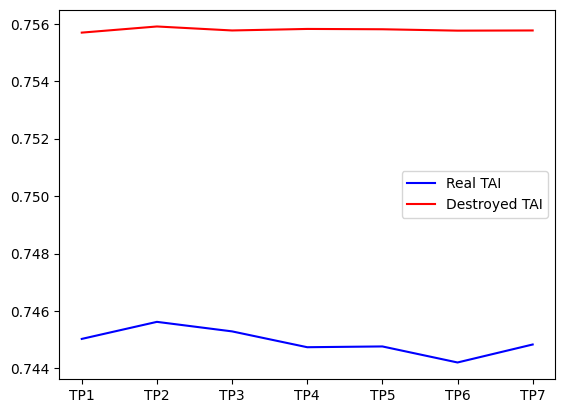

In [17]:
new_data = expression_data.remove_genes(ga_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")

plt.legend()
plt.show()

In [18]:
new_tai_var = np.var(new_data.tai).item()
print("destroyed TAI p-value:", get_p_value(new_tai_var))

destroyed TAI p-value: 0.5456327638961539


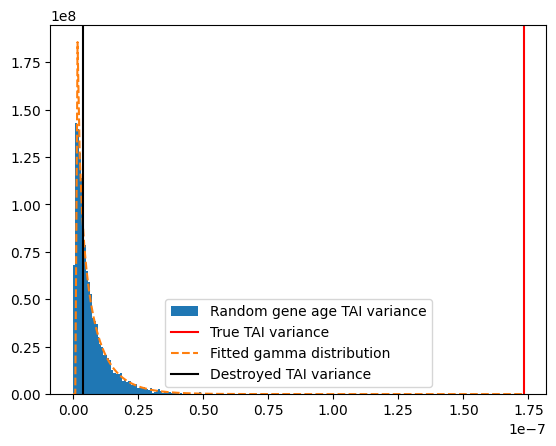

In [19]:
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")


x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")
plt.axvline(x=new_tai_var, label="Destroyed TAI variance", color="black")
plt.legend()
plt.show()

### 3.3 Benchmark GA against greedy removal of genes with highest variance

In [20]:
gene_variances = expression_data.gene_variances.sort_values('Variance', ascending=False)
gene_variances

,Phylostratum,GeneID,Variance
10662,0.705924,at4g22505,79.366462
10660,0.705924,at4g22485,75.100151
2655,0.991740,at1g56660,47.590407
13413,0.705924,at5g26000,24.112823
3090,0.705924,at1g67090,23.803816
...,...,...,...
9295,0.705924,at3g60330,0.000298
917,0.705924,at1g14470,0.000297
802,0.705924,at1g12775,0.000286
7748,0.705924,at3g20420,0.000285


In [21]:
k_top = len(ga_genes)

highest_var_genes = gene_variances.head(k_top)['GeneID'].to_numpy()

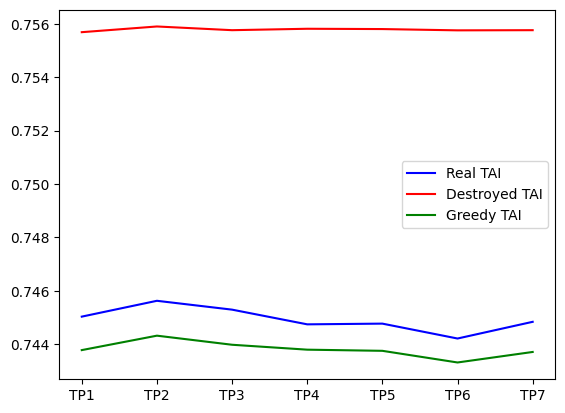

In [22]:
greedy_data = expression_data.remove_genes(highest_var_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")
plt.plot(greedy_data.tai, label="Greedy TAI", color="green")

plt.legend()
plt.show()

In [23]:
greedy_tai_var = np.var(greedy_data.tai).item()
print("p-value: ", get_p_value(greedy_tai_var))

p-value:  8.420335376390258e-05


Conversely, however, the genes that were extracted by GATAI tend to have a high variance (but they need to be carefully selected, it's not as simple as picking the most variant ones, hence the need for the GA approach)

In [24]:
common_genes = np.intersect1d(ga_genes, highest_var_genes)

print("Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset:", len(common_genes), "out of", len(ga_genes))

Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset: 77 out of 424
